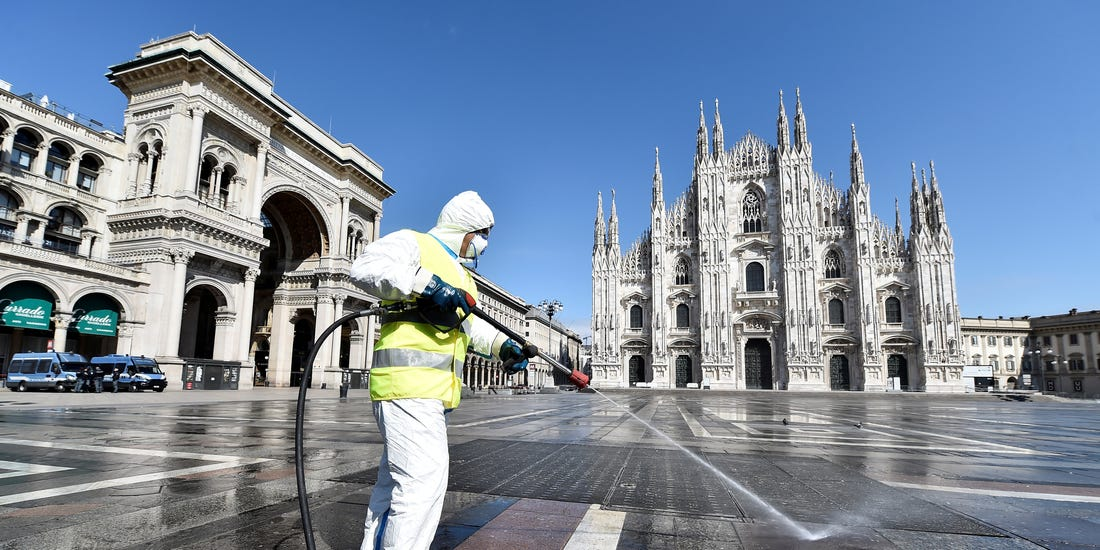

# Exploring Factors Related to Global Rates of COVID-19.


## by Amy Reidy 

### May 17th, 2021

## 1. Project Scope

The overall aim of this project is to utilize skills learned in the ‘Introductory Programming for Data Science’ module of I.T. Sligo's MSc in Data Science program to explore factors that may be related to global rates of COVID-19. There are two main goals:

 ### a) Test the claim that female-led countries have lower rates of COVID-19.
While researching factors related to COVID-19 rates, I was intrigued by studies and media reports claiming that countries with female heads of state were handling the pandemic better than male leaders, and that female-led countries have lower rates of COVID-19 deaths per capita (Garikipati & Kambhampati, 2020, Coscieme et al., 2020). However, a study by Winsor et al (2020) asserts that this perception has been caused by data selection bias and Western media bias that has amplified the successes of female leaders in OECD countries, and that there is not a significant difference globally in countries led by women versus men. 
And so, this project tests the hypothesis that female-led countries have lower rates of COVID-19 than male-led countries, using all the countries in the dataset and for a separate sample of just OECD countries.

### b) Create a linear regression model to predict rates of COVID-19 in countries around the world.
For the regression analysis section, multiple linear regression models will be created using both Tensorflow and Scikit-learn. The target variable is **‘Confirmed Cases of COVID-19 per 100,000 Population’**, and the following independent variables will be used:


•	**Smoking** – Smoking impairs lung functioning and COVID-19 is a virus which primarily attacks the lungs, and there is evidence that smokers may have a higher likelihood of developing more severe symptoms of the disease than non-smokers (Shastri et al., 2021, Lewis, 2020). 

•	**Obesity** – Studies around the world have identified obesity and severe obesity as risk factors for hospitalization and mechanical ventilation in relation to COVID-19 (Popkin et al., 2020, Gao et al., 2020, Dietz, W., & Santos‐Burgoa, C., 2020). 

•	**Life Expectancy** - Older people are more vulnerable to COVID-19, and they are more likely to have serious COVID-19 symptoms and require hospitalization or even succumb to the virus. And studies show that countries with high life expectancy, such as Italy, have had high case rates and death rates (Dowd et al., 2020).

•	**OECD Membership** – this is a categorial variable for whether the country is part of the Organisation for Economic Co-operation and Development (OECD). Most OECD countries are high-income, developed countries, which seem to have generally have higher confirmed rates of COVID-19 compared to middle- and low-income countries. One of the many reasons for this could be due to higher testing rates and less deaths misattributed to other causes, as these countries may have more robust health systems than poorer countries. Unfortunately, there is no accurate data available to confirm this. 


## 2. Data Preparation

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import folium
import pycountry
from pycountry import countries
import scipy.stats as st
import tensorflow as tf
import tensorboard

sns.set_palette("bright")
%matplotlib inline

**COVID-19 Cases and Deaths**

The data for COVID-19 rates around the world is retrieved by sending an API request to 'https://api.covid19api.com/summary' and extracting data in JSN format.

In [2]:
req = requests.get('https://api.covid19api.com/summary') # sending request to API
js = req.json() # extracting the API result in JSON format 

country_data = pd.DataFrame()
# data restructuring
for i in range(len(js['Countries'])):
    js['Countries'][i].pop('Premium')
    country_data = country_data.append(pd.DataFrame(js['Countries'][i],index=[i])).copy()

country_data_main = country_data.copy()
display(country_data)

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,84207d49-268d-4440-afeb-fe87389f290e,Afghanistan,AF,afghanistan,0,63484,0,2742,0,54686,2021-05-17T08:56:26.124Z
1,87ea5d56-4725-48fe-970c-5b6d5196efee,Albania,AL,albania,0,132015,0,2432,0,124312,2021-05-17T08:56:26.124Z
2,f85e1726-ead6-4df6-a687-44d3a6cdeeb7,Algeria,DZ,algeria,0,125311,0,3374,0,87359,2021-05-17T08:56:26.124Z
3,74a7696b-5320-4e93-a966-0bf6ec959259,Andorra,AD,andorra,0,13510,0,127,0,13155,2021-05-17T08:56:26.124Z
4,ae9565e0-4107-445d-ac1d-b31b9e33091b,Angola,AO,angola,0,30637,0,659,0,25715,2021-05-17T08:56:26.124Z
...,...,...,...,...,...,...,...,...,...,...,...
185,ee1c554e-14bc-4cc2-b2fd-2fde61bac5ed,Venezuela (Bolivarian Republic),VE,venezuela,0,215301,0,2396,0,199202,2021-05-17T08:56:26.124Z
186,4667475f-1c99-4984-ae3d-55f2ef175bb1,Viet Nam,VN,vietnam,0,4212,0,37,0,2668,2021-05-17T08:56:26.124Z
187,1b922ad9-c822-436e-bd21-d807e431b516,Yemen,YE,yemen,0,6543,0,1289,0,3023,2021-05-17T08:56:26.124Z
188,cb9b5f7b-d243-43cb-83b4-072fcb5e7911,Zambia,ZM,zambia,0,92436,0,1260,0,90816,2021-05-17T08:56:26.124Z


Creating a new dataframe with just the columns we're interested in.

In [3]:
covid_data = country_data[['Country', 'CountryCode', 'TotalConfirmed','TotalDeaths']].copy() 
covid_data.columns = ['Country', 'Code', 'Cases', 'Deaths'] # renaming columns
covid_data.head()

,Country,Code,Cases,Deaths
0,Afghanistan,AF,63484,2742
1,Albania,AL,132015,2432
2,Algeria,DZ,125311,3374
3,Andorra,AD,13510,127
4,Angola,AO,30637,659


In [4]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  190 non-null    object
 1   Code     190 non-null    object
 2   Cases    190 non-null    int64 
 3   Deaths   190 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.4+ KB


We can see there are no null values in the dataset. Now let's look at a statistical summary of the dataframe, visualize the data on distribution plots, and see which countries have the most and least cases.

In [5]:
covid_data.describe() 

,Cases,Deaths
count,1.900000e+02,190.000000
mean,8.569644e+05,17773.273684
std,3.287347e+06,61445.176238
min,1.000000e+00,0.000000
25%,1.156300e+04,150.250000
50%,9.776100e+04,1241.000000
75%,3.849148e+05,7614.000000
max,3.294085e+07,585970.000000


C:\Users\user\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cases', ylabel='Density'>

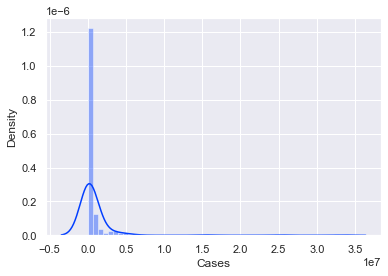

In [6]:
sns.distplot(covid_data['Cases'])

C:\Users\user\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Deaths', ylabel='Density'>

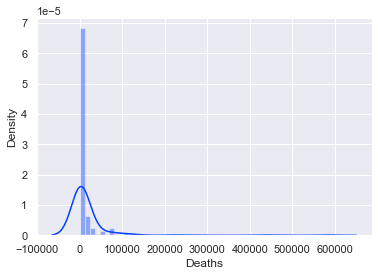

In [7]:
sns.distplot(covid_data['Deaths'])

In [8]:
covid_data = covid_data.sort_values(by=['Cases'], ascending=False)
covid_data.head(20)

,Country,Code,Cases,Deaths
181,United States of America,US,32940846,585970
76,India,IN,24965463,274390
23,Brazil,BR,15627243,435751
59,France,FR,5939019,107777
176,Turkey,TR,5117374,44760
140,Russian Federation,RU,4883734,113927
180,United Kingdom,GB,4466589,127941
82,Italy,IT,4159122,124156
160,Spain,ES,3604799,79339
63,Germany,DE,3602939,86166


In [9]:
covid_data.tail(20)

,Country,Code,Cases,Deaths
147,Sao Tome and Principe,ST,2327,35
95,Liberia,LR,2114,85
144,Saint Vincent and Grenadines,VC,1937,12
168,"Taiwan, Republic of China",TW,1682,12
91,Lao PDR,LA,1591,2
19,Bhutan,BT,1286,1
109,Mauritius,MU,1282,17
5,Antigua and Barbuda,AG,1241,33
170,"Tanzania, United Republic of",TZ,509,21
24,Brunei Darussalam,BN,232,3


The U.S.A, India and Brazil have the highest total numbers of confirmed cases in the world, while many island states have less than 100 cases. Later we will calculate the number of cases and deaths per 100,000 people to put these numbers in perspective. 

**Population**

To calculate the rates per 100,000 people, we need the population for each country, which we will obtain by reading in a csv file that was downloaded from https://ourworldindata.org/grapher/population?time=2019..latest.

In [10]:
population = pd.read_csv('population.csv')
population.head()

,Entity,Code,Year,"Total population (Gapminder, HYDE & UN)"
0,Afghanistan,AFG,1800,3280000
1,Afghanistan,AFG,1801,3280000
2,Afghanistan,AFG,1802,3280000
3,Afghanistan,AFG,1803,3280000
4,Afghanistan,AFG,1804,3280000


In [11]:
population.columns = ['Country', 'Code3', 'Year', 'Population'] #renaming columns
population

,Country,Code3,Year,Population
0,Afghanistan,AFG,1800,3280000
1,Afghanistan,AFG,1801,3280000
2,Afghanistan,AFG,1802,3280000
3,Afghanistan,AFG,1803,3280000
4,Afghanistan,AFG,1804,3280000
...,...,...,...,...
46878,Zimbabwe,ZWE,2015,13815000
46879,Zimbabwe,ZWE,2016,14030000
46880,Zimbabwe,ZWE,2017,14237000
46881,Zimbabwe,ZWE,2018,14439000


This dataset contains all the historical data for population, but we only need the latest value for each country, so we will drop the rest of the rows. 

In [12]:
population = population.sort_values(by="Year").drop_duplicates(subset=["Country"], keep="last") 
population.head()

,Country,Code3,Year,Population
14185,Fiji,FJI,2019,890000
23157,Liberia,LBR,2019,4937000
22277,Latin America,NaN,2019,648121024
22155,Laos,LAO,2019,7169000
13043,Eritrea,ERI,2019,3497000


In [13]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 14185 to 46882
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     242 non-null    object
 1   Code3       235 non-null    object
 2   Year        242 non-null    int64 
 3   Population  242 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 9.5+ KB


There are country codes missing for 7 rows so we need to check which rows are missing information. 

In [14]:
population[population['Code3'].isnull()]

,Country,Code3,Year,Population
22277,Latin America,NaN,2019,648121024
13825,Europe,NaN,2019,747182976
2213,Asia,NaN,2019,4601371136
341,Africa,NaN,2019,1308064000
34661,Saint Barthlemy,NaN,2019,10000
30299,North America,NaN,2019,366600992
31151,Oceania,NaN,2019,42128000


All of these rows are totals for continents (which we can drop from the dataframe), apart from Saint Barthlemy for which we can add the country code manually. 

In [15]:
population.loc[34661]

Country       Saint Barthlemy
Code3                     NaN
Year                     2019
Population              10000
Name: 34661, dtype: object

In [16]:
population.loc[34661, 'Code3'] = 'BLM'
population.loc[34661]

Country       Saint Barthlemy
Code3                     BLM
Year                     2019
Population              10000
Name: 34661, dtype: object

In [17]:
population.dropna(subset=['Code3'], inplace = True)
population[population['Code3'].isnull()]

,Country,Code3,Year,Population


In [18]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 14185 to 46882
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     236 non-null    object
 1   Code3       236 non-null    object
 2   Year        236 non-null    int64 
 3   Population  236 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 9.2+ KB


Next we will use pycountry.countries to create new column with the ISO 3166-1 alpha-2 codes for each country.

In [19]:
def get_country_code(code):
    for co in list(pycountry.countries):
        if code in co.alpha_3:
            return co.alpha_2
    return None

In [20]:
alpha2_codes = []
for code in list(population['Code3']):
    alpha2_codes.append(get_country_code(code))

print(len(alpha2_codes))
print(alpha2_codes)

236
['FJ', 'LR', 'LA', 'ER', 'LY', 'LU', 'MO', 'LB', 'SZ', 'LI', 'KM', 'LT', 'CO', 'EE', 'EG', 'FK', 'LS', 'SV', 'FO', 'CN', 'LV', 'ET', 'DO', 'CG', 'CU', 'GL', 'IQ', 'CW', 'GD', 'IR', 'GP', 'ID', 'GU', 'DJ', 'CY', 'GR', 'IN', 'GT', 'HU', 'GN', 'CZ', 'DK', 'HK', 'HN', 'GW', 'CD', 'HT', 'GY', 'IS', 'FI', 'IE', 'IM', 'FR', 'KG', 'GF', 'CK', 'KW', 'PF', 'KI', 'EC', 'CR', 'GA', 'KE', 'GI', 'KZ', 'JO', 'CI', 'JP', 'GE', 'JM', 'DE', 'DM', 'HR', 'IT', 'GH', 'IL', 'GM', 'AF', 'GQ', 'MG', 'SO', 'ZA', 'BS', 'KR', 'SS', 'AZ', 'ES', 'SB', 'LK', 'AT', 'SR', 'SE', 'AU', 'CH', 'SY', 'TW', 'SD', 'BH', 'SK', 'BZ', 'VC', 'WS', 'SM', 'BE', 'ST', 'SA', 'SI', 'BY', 'RS', 'BB', 'SC', 'SL', 'SG', 'SX', 'BD', 'SN', 'TJ', 'AW', 'TZ', 'GB', 'AS', 'US', 'VI', 'DZ', 'UY', 'UZ', 'AE', 'VU', 'VA', 'VE', 'VN', 'WF', 'EH', None, 'AL', 'AD', 'UA', 'UG', 'AM', 'TH', 'TL', 'AR', 'TG', 'TK', 'TO', 'TT', 'AG', 'TN', 'TR', 'AI', 'TM', 'TC', 'AO', 'TV', 'YE', 'PM', 'CL', 'MF', 'KN', 'MN', 'ME', 'MS', 'CM', 'MA', 'MZ', 'KH',

In [21]:
population['Code'] = alpha2_codes

Let's check for missing values.

In [22]:
population[population['Code'].isnull()]

,Country,Code3,Year,Population,Code
46222,World,OWID_WRL,2019,7713467904,None
8283,Channel Islands,OWID_CIS,2019,172000,None


In [23]:
covid_data[covid_data['Country'].str[0].isin(['C'])]

,Country,Code,Cases,Deaths
36,Colombia,CO,3118426,81300
44,Czech Republic,CZ,1652840,29901
34,Chile,CL,1286548,27832
30,Canada,CA,1116795,22760
41,Croatia,HR,350390,7708
40,Costa Rica,CR,282741,3547
42,Cuba,CU,124454,804
35,China,CN,102746,4846
29,Cameroon,CM,74946,1152
43,Cyprus,CY,71064,346


We can delete the total population for the world, and it doesn't appear that the Channel Islands are in the covid_data dataframe, so we will drop this row too, instead of manually entering the ISO code.

In [24]:
population.dropna(subset=['Code'], inplace = True)
population[population['Code'].isnull()]

,Country,Code3,Year,Population,Code


In [25]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 14185 to 46882
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     234 non-null    object
 1   Code3       234 non-null    object
 2   Year        234 non-null    int64 
 3   Population  234 non-null    int64 
 4   Code        234 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.0+ KB


Like what we did for the covid_data dataframe, we will also check the statistical summary, distribution and top/bottom values for this dataframe and the next dataframes. 

In [26]:
population.describe()

,Year,Population
count,234.0,2.340000e+02
mean,2019.0,3.296282e+07
std,0.0,1.344481e+08
min,2019.0,1.000000e+03
25%,2019.0,4.082500e+05
50%,2019.0,5.419000e+06
75%,2019.0,2.015525e+07
max,2019.0,1.433784e+09


C:\Users\user\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population', ylabel='Density'>

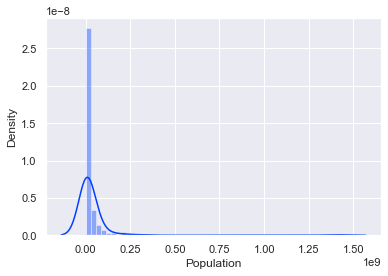

In [27]:
sns.distplot(population['Population'])

In [28]:
population = population.sort_values(by=['Population'], ascending = False)
population.drop('Year', axis=1, inplace=True)
population.head(20)

,Country,Code3,Population,Code
8723,China,CHN,1433784064,CN
18785,India,IND,1366418048,IN
44541,United States,USA,329064992,US
19005,Indonesia,IDN,270625984,ID
31591,Pakistan,PAK,216564992,PK
5873,Brazil,BRA,211050000,BR
30107,Nigeria,NGA,200964000,NG
3533,Bangladesh,BGD,163046000,BD
34371,Russia,RUS,145872000,RU
26447,Mexico,MEX,127576000,MX


In [29]:
population.tail(20)

,Country,Code3,Population,Code
43221,Turks and Caicos Islands,TCA,38000,TC
35241,Saint Martin (French part),MAF,38000,MF
15935,Gibraltar,GIB,34000,GI
35971,San Marino,SMR,34000,SM
5943,British Virgin Islands,VGB,30000,VG
5213,Bonaire Sint Eustatius and Saba,BES,26000,BQ
9453,Cook Islands,COK,18000,CK
31811,Palau,PLW,18000,PW
1361,Anguilla,AIA,15000,AI
43441,Tuvalu,TUV,12000,TV


It's likely that we will not have COVID-19 data for many of these countries with smaller populations as there are only 190 countries in the covid_data dataframe, as opposed to 234 countries in the population dataframe. But we don't need to remove these countries now as they will be excluded later when we merge the data. 

### Dependent Variables


**Smoking**

The next dataset we will load is a csv file that shows the shares of deaths attributed to direct smoking for each country. It was sourced from https://ourworldindata.org/smoking.

In [30]:
smoking = pd.read_csv('share-deaths-smoking.csv')
smoking.head()

,Entity,Code,Year,"Smoking (IHME, 2019)"
0,Afghanistan,AFG,1990,3.26
1,Afghanistan,AFG,1991,3.21
2,Afghanistan,AFG,1992,3.14
3,Afghanistan,AFG,1993,2.84
4,Afghanistan,AFG,1994,2.65


In [31]:
smoking.columns = ['Country', 'Code3', 'Year', 'Smoking'] # changing the columns names
smoking.head()

,Country,Code3,Year,Smoking
0,Afghanistan,AFG,1990,3.26
1,Afghanistan,AFG,1991,3.21
2,Afghanistan,AFG,1992,3.14
3,Afghanistan,AFG,1993,2.84
4,Afghanistan,AFG,1994,2.65


Let's keep the most recent year, which should be 2017 and drop the other years. 

In [32]:
smoking = smoking.sort_values(by="Year").drop_duplicates(subset=["Country"], keep="last") 
smoking.head()

,Country,Code3,Year,Smoking
83,Albania,ALB,2017,19.11
4787,Rwanda,RWA,2017,5.56
2015,Europe,NaN,2017,16.21
1511,Czechia,CZE,2017,18.84
867,Bulgaria,BGR,2017,18.86


In [33]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 83 to 6411
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  229 non-null    object 
 1   Code3    194 non-null    object 
 2   Year     229 non-null    int64  
 3   Smoking  229 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.9+ KB


Again we need to check which rows are missing values for country code.

In [34]:
smoking[smoking['Code3'].isnull()]

,Country,Code3,Year,Smoking
2015,Europe,NaN,2017,16.21
2043,Europe & Central Asia,NaN,2017,15.99
6299,Western Sub-Saharan Africa,NaN,2017,1.60
4227,North America,NaN,2017,15.03
55,Africa,NaN,2017,3.80
3163,Latin America & Caribbean,NaN,2017,10.20
5459,Sub-Saharan Africa,NaN,2017,2.73
2603,High-middle SDI,NaN,2017,17.94
3443,Lower-middle income,NaN,2017,9.33
1679,East Asia,NaN,2017,20.81


All of these rows are totals for continents or regions, so they can be deleted. 

In [35]:
smoking.dropna(subset=['Code3'], inplace = True)
smoking[smoking['Code3'].isnull()]

,Country,Code3,Year,Smoking


Again let's convert the 3 letter country codes into 2 letter codes. 

In [36]:
alpha2_codes = []
for name in list(smoking['Code3']):
    alpha2_codes.append(get_country_code(name))

print(len(alpha2_codes))
print(alpha2_codes)

194
['AL', 'RW', 'CZ', 'BG', 'SD', 'TL', 'BE', 'BN', 'DZ', 'NG', 'LS', 'CO', 'JP', 'GD', 'LB', 'MN', 'SC', 'TG', 'BZ', 'JO', 'MD', 'GR', 'ME', 'BW', 'AF', 'KI', 'LA', 'BT', 'MM', 'WS', 'HR', 'DE', 'TJ', 'ZM', 'GA', 'NL', 'CR', 'NA', 'SA', 'GE', 'SY', 'BA', 'KW', 'KG', 'BO', 'TW', 'ST', 'CI', 'GM', 'NP', 'CH', 'SN', 'GH', 'NZ', 'GL', 'KM', 'SR', 'LC', 'CY', 'NE', None, 'BJ', 'BR', 'RS', 'KZ', 'LV', 'TH', 'FJ', 'FI', 'MA', 'VC', 'CU', 'SE', 'KE', 'BM', 'MZ', 'YE', 'TZ', 'CG', 'FR', 'NI', 'GU', 'MW', 'SO', 'SS', 'ML', 'PH', 'CV', 'SV', 'UG', 'PK', 'UY', 'MT', 'IR', 'AR', 'AZ', 'IQ', 'UZ', 'MH', 'OM', 'GQ', 'DO', 'TM', 'CA', 'SB', 'PL', 'BS', 'PS', 'AM', 'GB', 'PY', 'PG', 'US', 'IN', 'MG', 'MY', 'HU', 'ZA', 'AU', 'UA', 'AT', 'HN', 'MV', 'LU', 'EG', 'ID', 'PE', 'PA', 'EC', 'KR', 'AE', 'CF', 'PT', 'AG', 'MP', 'AD', 'BI', 'SG', 'GN', 'IT', 'IS', 'LY', 'BB', 'TT', 'LK', 'VN', 'RO', 'DK', 'MK', 'TO', 'SL', 'CD', 'RU', 'KP', 'CL', 'LR', 'BY', 'CN', 'AS', 'BF', 'ET', 'GT', 'JM', 'SZ', 'ES', 'MU',

In [37]:
smoking['Code'] = alpha2_codes

In [38]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 83 to 6411
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  194 non-null    object 
 1   Code3    194 non-null    object 
 2   Year     194 non-null    int64  
 3   Smoking  194 non-null    float64
 4   Code     193 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 9.1+ KB


In [39]:
smoking[smoking['Code'].isnull()]

,Country,Code3,Year,Smoking,Code
6327,World,OWID_WRL,2017,12.69,None


We can drop the world total again.

In [40]:
smoking.dropna(subset=['Code'], inplace = True)
smoking.drop('Code3', axis=1, inplace=True)
smoking.drop('Year', axis=1, inplace=True)
smoking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 83 to 6411
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  193 non-null    object 
 1   Smoking  193 non-null    float64
 2   Code     193 non-null    object 
dtypes: float64(1), object(2)
memory usage: 6.0+ KB


In [41]:
smoking.describe()

,Smoking
count,193.000000
mean,10.523575
std,5.698040
min,0.850000
25%,5.570000
50%,10.380000
75%,14.770000
max,26.500000


C:\Users\user\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Smoking', ylabel='Density'>

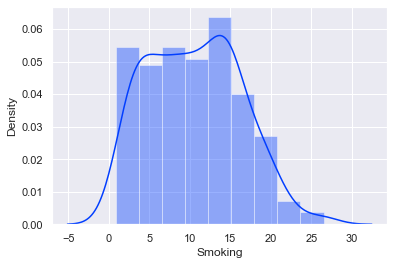

In [42]:
sns.distplot(smoking['Smoking'])

In [43]:
smoking = smoking.sort_values(by=['Smoking'], ascending = False)
smoking.head(20)

,Country,Smoking,Code
3919,Montenegro,26.50,ME
2323,Greenland,26.23,GL
755,Bosnia and Herzegovina,22.92,BA
4283,North Macedonia,22.39,MK
1567,Denmark,21.58,DK
1259,China,21.03,CN
2295,Greece,20.29,GR
4087,Netherlands,20.25,NL
4983,Serbia,19.99,RS
2659,Hungary,19.67,HU


In [44]:
smoking.tail(20)

,Country,Smoking,Code
3275,Liberia,2.98,LR
3527,Malawi,2.96,MW
2267,Ghana,2.90,GH
4955,Senegal,2.84,SN
979,Cameroon,2.74,CM
3695,Mauritania,2.63,MR
1539,Democratic Republic of Congo,2.59,CD
643,Benin,2.46,BJ
5291,South Sudan,2.45,SS
5963,Uganda,2.39,UG


Let's also check if the dataframe has any outliers using a boxplot. 

Text(0.5, 0, 'Share of Deaths Caused by Smoking')

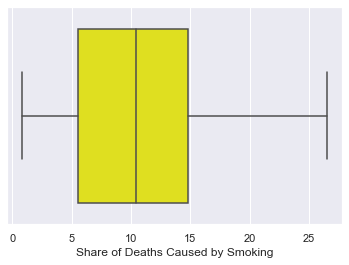

In [45]:
sns.boxplot(x=smoking['Smoking'], color='yellow')
plt.xlabel('Share of Deaths Caused by Smoking')


There doesn't appear to be any outliers, so can move onto the dataset for the variable.


**Obesity**

This next csv file contains values for the share of deaths in 2017 attributed to obesity for each country. It was sourced from the same website as the smoking file (https://ourworldindata.org/obesity) and so it is in the same format and it can be cleaned in a similar manner.

In [46]:
obesity = pd.read_csv('share-of-deaths-obesity.csv')
obesity.head()

,Entity,Code,Year,"Obesity (IHME, 2019)"
0,Afghanistan,AFG,1990,3.92
1,Afghanistan,AFG,1991,3.87
2,Afghanistan,AFG,1992,3.82
3,Afghanistan,AFG,1993,3.50
4,Afghanistan,AFG,1994,3.25


In [47]:
obesity.columns = ['Country', 'Code3', 'Year', 'Obesity'] # changing the columns names
obesity.head()

,Country,Code3,Year,Obesity
0,Afghanistan,AFG,1990,3.92
1,Afghanistan,AFG,1991,3.87
2,Afghanistan,AFG,1992,3.82
3,Afghanistan,AFG,1993,3.50
4,Afghanistan,AFG,1994,3.25


In [48]:
obesity = obesity.sort_values(by='Year').drop_duplicates(subset=['Country'], keep='last') 
obesity.head()

,Country,Code3,Year,Obesity
83,Albania,ALB,2017,12.11
4787,Rwanda,RWA,2017,2.87
2015,Europe,NaN,2017,12.72
1511,Czechia,CZE,2017,14.47
867,Bulgaria,BGR,2017,17.17


In [49]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 83 to 6411
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  229 non-null    object 
 1   Code3    194 non-null    object 
 2   Year     229 non-null    int64  
 3   Obesity  229 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.9+ KB


In [50]:
obesity[obesity['Code3'].isnull()]

,Country,Code3,Year,Obesity
2015,Europe,NaN,2017,12.72
2043,Europe & Central Asia,NaN,2017,12.86
6299,Western Sub-Saharan Africa,NaN,2017,2.62
4227,North America,NaN,2017,14.08
55,Africa,NaN,2017,5.17
3163,Latin America & Caribbean,NaN,2017,12.63
5459,Sub-Saharan Africa,NaN,2017,3.39
2603,High-middle SDI,NaN,2017,12.32
3443,Lower-middle income,NaN,2017,6.73
1679,East Asia,NaN,2017,7.80


In [51]:
obesity.dropna(subset=['Code3'], inplace = True)
obesity[obesity['Code3'].isnull()]

,Country,Code3,Year,Obesity


In [52]:
alpha2_codes = []
for name in list(obesity['Code3']):
    alpha2_codes.append(get_country_code(name))

print(len(alpha2_codes))
print(alpha2_codes)

194
['AL', 'RW', 'CZ', 'BG', 'SD', 'TL', 'BE', 'BN', 'DZ', 'NG', 'LS', 'CO', 'JP', 'GD', 'LB', 'MN', 'SC', 'TG', 'BZ', 'JO', 'MD', 'GR', 'ME', 'BW', 'AF', 'KI', 'LA', 'BT', 'MM', 'WS', 'HR', 'DE', 'TJ', 'ZM', 'GA', 'NL', 'CR', 'NA', 'SA', 'GE', 'SY', 'BA', 'KW', 'KG', 'BO', 'TW', 'ST', 'CI', 'GM', 'NP', 'CH', 'SN', 'GH', 'NZ', 'GL', 'KM', 'SR', 'LC', 'CY', 'NE', None, 'BJ', 'BR', 'RS', 'KZ', 'LV', 'TH', 'FJ', 'FI', 'MA', 'VC', 'CU', 'SE', 'KE', 'BM', 'MZ', 'YE', 'TZ', 'CG', 'FR', 'NI', 'GU', 'MW', 'SO', 'SS', 'ML', 'PH', 'CV', 'SV', 'UG', 'PK', 'UY', 'MT', 'IR', 'AR', 'AZ', 'IQ', 'UZ', 'MH', 'OM', 'GQ', 'DO', 'TM', 'CA', 'SB', 'PL', 'BS', 'PS', 'AM', 'GB', 'PY', 'PG', 'US', 'IN', 'MG', 'MY', 'HU', 'ZA', 'AU', 'UA', 'AT', 'HN', 'MV', 'LU', 'EG', 'ID', 'PE', 'PA', 'EC', 'KR', 'AE', 'CF', 'PT', 'AG', 'MP', 'AD', 'BI', 'SG', 'GN', 'IT', 'IS', 'LY', 'BB', 'TT', 'LK', 'VN', 'RO', 'DK', 'MK', 'TO', 'SL', 'CD', 'RU', 'KP', 'CL', 'LR', 'BY', 'CN', 'AS', 'BF', 'ET', 'GT', 'JM', 'SZ', 'ES', 'MU',

In [53]:
obesity['Code'] = alpha2_codes
obesity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 83 to 6411
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  194 non-null    object 
 1   Code3    194 non-null    object 
 2   Year     194 non-null    int64  
 3   Obesity  194 non-null    float64
 4   Code     193 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 9.1+ KB


In [54]:
obesity[obesity['Code'].isnull()]

,Country,Code3,Year,Obesity,Code
6327,World,OWID_WRL,2017,8.44,None


In [55]:
obesity.dropna(subset=['Code'], inplace = True)
obesity.drop('Code3', axis=1, inplace=True)
obesity.drop('Year', axis=1, inplace=True)
obesity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 83 to 6411
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  193 non-null    object 
 1   Obesity  193 non-null    float64
 2   Code     193 non-null    object 
dtypes: float64(1), object(2)
memory usage: 6.0+ KB


In [56]:
obesity.describe()

,Obesity
count,193.000000
mean,10.728964
std,5.518141
min,1.360000
25%,6.350000
50%,10.660000
75%,14.890000
max,29.430000


C:\Users\user\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Obesity', ylabel='Density'>

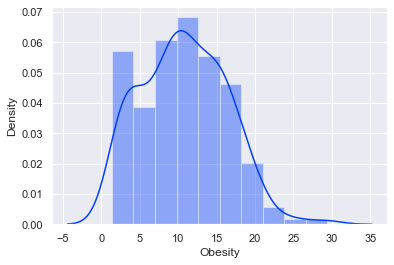

In [57]:
sns.distplot(obesity['Obesity'])

In [58]:
obesity = obesity.sort_values(by=['Obesity'], ascending = False)
obesity.head(20)

,Country,Obesity,Code
2071,Fiji,29.43,FJ
475,Bahrain,25.69,BH
139,American Samoa,23.53,AS
3079,Kuwait,21.45,KW
2379,Guam,21.13,GU
1819,Egypt,20.52,EG
4703,Qatar,20.06,QA
5823,Trinidad and Tobago,19.97,TT
4311,Northern Mariana Islands,19.73,MP
3219,Lebanon,19.66,LB


In [59]:
obesity.tail(20)

,Country,Obesity,Code
2435,Guinea,3.14,GN
5039,Sierra Leone,3.03,SL
5739,Timor,3.00,TL
4787,Rwanda,2.87,RW
6383,Zambia,2.82,ZM
1903,Eritrea,2.81,ER
3527,Malawi,2.79,MW
895,Burkina Faso,2.57,BF
3975,Mozambique,2.51,MZ
1539,Democratic Republic of Congo,2.50,CD


Text(0.5, 0, 'Share of Obesity Caused by Smoking')

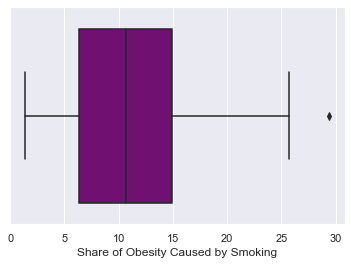

In [60]:
sns.boxplot(x=obesity['Obesity'], color='purple')
plt.xlabel('Share of Obesity Caused by Smoking')


After visualizing the data on a boxplot, there appears to be one outlier. We can check if this outlier is significant by finding its z-score and checking if it is more than 3 standard deviations away from the mean.

In [61]:
z = np.abs(st.zscore(obesity['Obesity'])) # getting the z-score for all countries.
threshold = 3
print(np.where(z > 3)) #checking if there are any countries with a z-score > 3

(array([0], dtype=int64),)


In [62]:
obesity.iloc[0]

Country     Fiji
Obesity    29.43
Code          FJ
Name: 2071, dtype: object

In [63]:
covid_data[covid_data['Country'].str[0].isin(['F'])]

,Country,Code,Cases,Deaths
59,France,FR,5939019,107777
58,Finland,FI,90105,931
57,Fiji,FJ,172,4


The test shows that Fiji is a significant outlier. Outliers like these can distort the statistical analysis later so I have decided to remove this row from the dataframe. 

In [64]:
obesity = obesity.drop(obesity.index[0])
obesity

,Country,Obesity,Code
475,Bahrain,25.69,BH
139,American Samoa,23.53,AS
3079,Kuwait,21.45,KW
2379,Guam,21.13,GU
1819,Egypt,20.52,EG
...,...,...,...
4199,Nigeria,1.63,NG
5291,South Sudan,1.56,SS
4171,Niger,1.48,NE
1203,Chad,1.39,TD


In [65]:
obesity.describe()

,Obesity
count,192.000000
mean,10.631562
std,5.363649
min,1.360000
25%,6.335000
50%,10.645000
75%,14.755000
max,25.690000


**Life Expectancy** 

The next dataset shows the average life expectancy for each country around the world. 

This csv file was also sourced at ourworldindata.org (https://ourworldindata.org/life-expectancy) so it will be treated the same as the previous two files. 

In [66]:
lifeexp = pd.read_csv('life-expectancy.csv')
lifeexp.head()

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350


In [67]:
lifeexp.columns = ['Country', 'Code3', 'Year', 'Life_Expectancy'] # changing the columns names
lifeexp.head()

,Country,Code3,Year,Life_Expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350


In [68]:
lifeexp = lifeexp.sort_values(by="Year").drop_duplicates(subset=["Country"], keep="last") 
lifeexp.head()

,Country,Code3,Year,Life_Expectancy
14081,Saint Barthlemy,NaN,2019,82.023
12521,Northern Mariana Islands,MNP,2019,76.735
14291,Saint Lucia,LCA,2019,76.203
13704,Qatar,QAT,2019,80.227
13342,Peru,PER,2019,76.736


In [69]:
lifeexp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 14081 to 19027
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          243 non-null    object 
 1   Code3            235 non-null    object 
 2   Year             243 non-null    int64  
 3   Life_Expectancy  243 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.5+ KB


In [70]:
lifeexp[lifeexp['Code3'].isnull()]

,Country,Code3,Year,Life_Expectancy
14081,Saint Barthlemy,NaN,2019,82.023000
12451,Northern America,NaN,2019,79.221000
12769,Oceania,NaN,2019,78.710000
141,Africa,NaN,2019,63.170000
430,Americas,NaN,2019,76.835389
9219,Latin America and the Caribbean,NaN,2019,75.486000
5496,Europe,NaN,2019,78.587000
1010,Asia,NaN,2019,73.593000


In [71]:
lifeexp.loc[14081, 'Code3'] = 'BLM'
lifeexp.loc[14081]

Country            Saint Barthlemy
Code3                          BLM
Year                          2019
Life_Expectancy             82.023
Name: 14081, dtype: object

In [72]:
lifeexp.dropna(subset=['Code3'], inplace = True)
lifeexp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 14081 to 19027
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          236 non-null    object 
 1   Code3            236 non-null    object 
 2   Year             236 non-null    int64  
 3   Life_Expectancy  236 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.2+ KB


In [73]:
alpha2_codes = []
for code in list(lifeexp['Code3']):
    alpha2_codes.append(get_country_code(code))

print(len(alpha2_codes))
print(alpha2_codes)

236
['BL', 'MP', 'LC', 'QA', 'PE', 'RE', 'OM', 'FR', 'HT', 'PS', 'PK', 'FJ', 'YE', 'GF', 'HR', 'PL', 'HK', 'MK', 'GY', 'PG', 'PR', 'BJ', 'RU', 'CW', 'KM', 'PA', 'NO', 'HN', 'BE', 'BM', 'KN', 'BB', 'FI', 'PT', 'RO', 'SH', 'PW', 'CI', 'BT', 'BZ', 'BY', 'KP', 'RW', 'PY', 'CU', 'ZM', 'BO', 'PH', 'AZ', 'MF', 'IR', 'TH', 'LI', 'GQ', 'GL', 'LY', 'IQ', 'GN', 'TL', 'LT', 'LR', 'TG', 'UZ', 'AI', 'LS', 'TK', 'CM', 'LB', None, 'TO', 'SV', 'KH', 'TJ', 'VA', 'AM', 'ML', 'SE', 'MV', 'AR', 'MY', 'ID', 'MW', 'TZ', 'CH', 'MG', 'SY', 'BI', 'GR', 'TW', 'MO', 'AG', 'VU', 'LU', 'ER', 'EE', 'GD', 'TT', 'AE', 'VI', 'GU', 'CD', 'JP', 'JM', 'EC', 'IM', 'JO', 'AS', 'KY', 'GB', 'DO', 'CF', 'IT', 'IL', 'TD', 'AL', 'US', 'DZ', 'LV', 'CV', 'AD', 'TN', 'LA', 'TR', 'AO', 'KG', 'UY', 'TM', 'CA', 'UA', 'KW', 'EG', 'IE', 'GP', 'CG', 'KI', 'TV', 'KE', 'UG', 'KZ', 'TC', 'CZ', 'CK', 'GI', 'SN', 'BW', 'NP', 'RS', 'CY', 'FO', 'NR', 'SC', 'BH', 'BA', 'CN', 'CR', 'SL', 'BR', 'NA', 'MM', 'AF', 'WF', 'SG', 'MZ', 'GM', 'SX', 'EH',

In [74]:
lifeexp['Code'] = alpha2_codes
lifeexp[lifeexp['Code'].isnull()]

,Country,Code3,Year,Life_Expectancy,Code
3394,Channel Islands,OWID_CIS,2019,83.086,None
18817,World,OWID_WRL,2019,72.584,None


In [75]:
lifeexp.dropna(subset=['Code'], inplace = True)
lifeexp.drop('Code3', axis=1, inplace=True)
lifeexp.drop('Year', axis=1, inplace=True)
lifeexp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 14081 to 19027
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          234 non-null    object 
 1   Life_Expectancy  234 non-null    float64
 2   Code             234 non-null    object 
dtypes: float64(1), object(2)
memory usage: 7.3+ KB


In [76]:
lifeexp.describe()

,Life_Expectancy
count,234.000000
mean,73.761299
std,7.426460
min,53.283000
25%,69.608000
50%,75.070500
75%,79.809000
max,86.751000


C:\Users\user\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Life_Expectancy', ylabel='Density'>

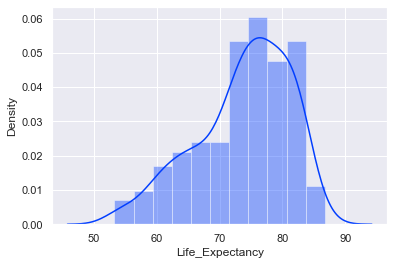

In [77]:
sns.distplot(lifeexp['Life_Expectancy'])

In [78]:
lifeexp = lifeexp.sort_values(by=['Life_Expectancy'], ascending = False)
lifeexp.head(20)

,Country,Life_Expectancy,Code
11005,Monaco,86.751,MC
14641,San Marino,84.972,SM
7502,Hong Kong,84.857,HK
8648,Japan,84.629,JP
9903,Macao,84.244,MO
3184,Cayman Islands,83.924,KY
16452,Switzerland,83.779,CH
500,Andorra,83.732,AD
15135,Singapore,83.620,SG
15821,Spain,83.565,ES


In [79]:
lifeexp.tail(20)

,Country,Life_Expectancy,Code
2724,Burkina Faso,61.577,BF
19027,Zimbabwe,61.490,ZW
571,Angola,61.147,AO
16946,Togo,61.042,TG
11355,Mozambique,60.854,MZ
4430,Democratic Republic of Congo,60.681,CD
5349,Eswatini,60.194,SZ
11566,Nauru,59.962,NR
10253,Mali,59.306,ML
2936,Cameroon,59.292,CM


Text(0.5, 0, 'Life Expectancy')

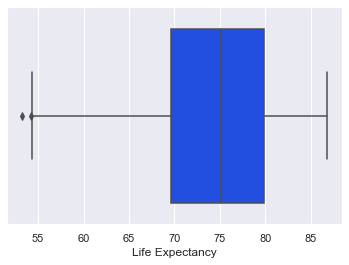

In [80]:
sns.boxplot(x=lifeexp['Life_Expectancy'])
plt.xlabel('Life Expectancy')

In [81]:
z = np.abs(st.zscore(lifeexp['Life_Expectancy'])) # getting the z-score for all countries.
threshold = 3
print(np.where(z > 3)) #checking if there are any countries with a z-score > 3

(array([], dtype=int64),)


There appears to be one or two outliers for life expectancy, but neither are more than 3 standard deviations away from the mean so we don't need to worry about them. 
\
\
\
**Female Leaders**

To get a list of countries that have had a female leader for the COVID-19 outbreak, I will use BeautifulSoup to web-scrape a table with female heads of state and government from this wikipedia page: https://en.wikipedia.org/wiki/List_of_elected_and_appointed_female_heads_of_state_and_government

In [82]:
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_elected_and_appointed_female_heads_of_state_and_government').text

In [ ]:
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

In [ ]:
mytable = soup.find('table',{'class':'wikitable sortable'})
mytable

In [85]:
def tableDataText(table):       
    rows = []
    trs = table.find_all('tr')
    headerow = [td.get_text(strip=True) for td in trs[0].find_all('th')] # header row
    if headerow: # if there is a header row include first
        rows.append(headerow)
        trs = trs[1:]
    for tr in trs: # for every table row
        rows.append([td.get_text(strip=True) for td in tr.find_all('td')]) # data row
    return rows

In [86]:
newtable = tableDataText(mytable)
leaders = pd.DataFrame(newtable) #turning table into dataframe
leaders.columns = leaders.iloc[0] #changing first row to column names
leaders = leaders[1:]
leaders

,Name,Portrait,Country,Office,Mandate start,Mandate end,Term length,Head of state or government
1,Khertek Anchimaa-Toka,,Tannu Tuva[c],Chairperson of the Presidium of the Little Khural,6 April 1940,11 October 1944,"4 years, 188 days",Head of state
2,Sükhbaataryn Yanjmaa,,Mongolia,ActingChairperson of the Presidium of the Stat...,7 September 1953,7 July 1954,303 days,Head of state
3,Sirimavo Bandaranaike,,Ceylon[d],Prime Minister,21 July 1960,27 March 1965,"4 years, 249 days",Head of government
4,Indira Gandhi,,India,Prime Minister,24 January 1966,24 April 1977,"11 years, 90 days",Head of government
5,Soong Ching-ling,,China,ActingCo-Chairperson,31 October 1968,24 April 1972,"3 years, 176 days",Head of state
...,...,...,...,...,...,...,...,...
155,Ingrida Šimonytė,,Lithuania,Prime Minister,25 November 2020,Incumbent,172 days,Head of government
156,Maia Sandu,,Moldova,President,24 December 2020,Incumbent,143 days,Head of state
157,Kaja Kallas,,Estonia,Prime Minister,26 January 2021,Incumbent,110 days,Head of government
158,Samia Suluhu Hassan,,Tanzania,President,19 March 2021,Incumbent,58 days,Head of state and government


In [87]:
currentleaders = leaders[leaders['Mandate end'] == 'Incumbent'] # getting the rows with current leaders
currentleaders

,Name,Portrait,Country,Office,Mandate start,Mandate end,Term length,Head of state or government
71,Angela Merkel,,Germany,Chancellor,22 November 2005,Incumbent,"15 years, 175 days",Head of government
83,Sheikh Hasina,,Bangladesh,Prime Minister,6 January 2009,Incumbent,"12 years, 130 days",Head of government
110,Erna Solberg,,Norway,Prime Minister,16 October 2013,Incumbent,"7 years, 212 days",Head of government
118,Saara Kuugongelwa,,Namibia,Prime Minister,21 March 2015,Incumbent,"6 years, 56 days",Head of government
124,Bidhya Devi Bhandari,,Nepal,President,29 October 2015,Incumbent,"5 years, 199 days",Head of state
130,Tsai Ing-wen,,Republic of China(Taiwan),President,20 May 2016,Incumbent,"4 years, 361 days",Head of state
133,Kersti Kaljulaid,,Estonia,President,10 October 2016,Incumbent,"4 years, 218 days",Head of state
134,Ana Brnabić,,Serbia,Prime Minister,29 June 2017,Incumbent,"3 years, 321 days",Head of government
135,Halimah Yacob,,Singapore,President,14 September 2017,Incumbent,"3 years, 244 days",Head of state
136,Jacinda Ardern,,New Zealand,Prime Minister,26 October 2017,Incumbent,"3 years, 202 days",Head of government


In [88]:
currentleaders.drop(currentleaders.tail(7).index,inplace=True) #dropping leaders who have only been in the role for < 1 year
currentleaders

C:\Users\user\.conda\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Name,Portrait,Country,Office,Mandate start,Mandate end,Term length,Head of state or government
71,Angela Merkel,,Germany,Chancellor,22 November 2005,Incumbent,"15 years, 175 days",Head of government
83,Sheikh Hasina,,Bangladesh,Prime Minister,6 January 2009,Incumbent,"12 years, 130 days",Head of government
110,Erna Solberg,,Norway,Prime Minister,16 October 2013,Incumbent,"7 years, 212 days",Head of government
118,Saara Kuugongelwa,,Namibia,Prime Minister,21 March 2015,Incumbent,"6 years, 56 days",Head of government
124,Bidhya Devi Bhandari,,Nepal,President,29 October 2015,Incumbent,"5 years, 199 days",Head of state
130,Tsai Ing-wen,,Republic of China(Taiwan),President,20 May 2016,Incumbent,"4 years, 361 days",Head of state
133,Kersti Kaljulaid,,Estonia,President,10 October 2016,Incumbent,"4 years, 218 days",Head of state
134,Ana Brnabić,,Serbia,Prime Minister,29 June 2017,Incumbent,"3 years, 321 days",Head of government
135,Halimah Yacob,,Singapore,President,14 September 2017,Incumbent,"3 years, 244 days",Head of state
136,Jacinda Ardern,,New Zealand,Prime Minister,26 October 2017,Incumbent,"3 years, 202 days",Head of government


In [89]:
femaleleaders = currentleaders[['Name', 'Country', 'Mandate end']].copy()
femaleleaders.columns = ['Name', 'Country', 'Female_Leader']
femaleleaders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 71 to 151
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           19 non-null     object
 1   Country        19 non-null     object
 2   Female_Leader  19 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


We can see that 19 countries in the world have had a female leader for the COVID-19 pandemic, with the President of Greece being the most recently appointed leader, starting her presidency just two days after WHO declared the global pandemic.

Next we will get the country codes, this time using the name of the country to obtain its alpha-2 code.

In [90]:
def get_country_code(name):
    for co in list(pycountry.countries):
        if name in co.name:
            return co.alpha_2
    return None

In [91]:
alpha2_codes = []
for name in list(femaleleaders['Country']):
    alpha2_codes.append(get_country_code(name))

print(len(alpha2_codes))
print(alpha2_codes)

19
['DE', 'BD', 'NO', 'NA', 'NP', None, 'EE', 'RS', 'SG', 'NZ', 'IS', 'TT', 'BB', 'ET', 'GE', 'SK', 'DK', 'FI', 'GR']


In [92]:
femaleleaders['Code'] = alpha2_codes
femaleleaders

,Name,Country,Female_Leader,Code
71,Angela Merkel,Germany,Incumbent,DE
83,Sheikh Hasina,Bangladesh,Incumbent,BD
110,Erna Solberg,Norway,Incumbent,NO
118,Saara Kuugongelwa,Namibia,Incumbent,NA
124,Bidhya Devi Bhandari,Nepal,Incumbent,NP
130,Tsai Ing-wen,Republic of China(Taiwan),Incumbent,None
133,Kersti Kaljulaid,Estonia,Incumbent,EE
134,Ana Brnabić,Serbia,Incumbent,RS
135,Halimah Yacob,Singapore,Incumbent,SG
136,Jacinda Ardern,New Zealand,Incumbent,NZ


In [93]:
femaleleaders = femaleleaders.reset_index(drop = True)

In [94]:
femaleleaders[femaleleaders['Code'].isnull()]

,Name,Country,Female_Leader,Code
5,Tsai Ing-wen,Republic of China(Taiwan),Incumbent,None


Taiwan is missing its code as it has been listed here as a territory of ROC, so the code needs to be entered manually.

In [95]:
femaleleaders.loc[5]

Name                          Tsai Ing-wen
Country          Republic of China(Taiwan)
Female_Leader                    Incumbent
Code                                  None
Name: 5, dtype: object

In [96]:
femaleleaders['Code'][5] = 'TW'

In [97]:
femaleleaders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           19 non-null     object
 1   Country        19 non-null     object
 2   Female_Leader  19 non-null     object
 3   Code           19 non-null     object
dtypes: object(4)
memory usage: 736.0+ bytes


**OECD**

The last dataset we will include in our database is a list of all countries part of the Organisation for Economic Co-operation and Development (OECD). This list was obtained from https://www.oecd.org/newsroom/global-oecd-welcomes-colombia-as-its-37th-member.htm#:~:text=The%20OECD's%2037%20members%20are,Poland%2C%20Portugal%2C%20Slovak%20Republic%2C. 

In [98]:
oecd = 'Austria, Australia, Belgium, Canada, Chile, Colombia, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Israel, Italy, Japan, Korea, Latvia, Lithuania, Luxembourg, Mexico, Netherlands, New Zealand, Norway, Poland, Portugal, Slovak Republic, Slovenia, Spain, Sweden, Switzerland, Turkey, United Kingdom, United States'
oecd_list = oecd.split(', ') #converting string into list
print(len(oecd_list))
print(oecd_list)

37
['Austria', 'Australia', 'Belgium', 'Canada', 'Chile', 'Colombia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']


In [99]:
alpha2_codes = []
for name in list(oecd_list):
    alpha2_codes.append(get_country_code(name))

print(len(alpha2_codes))
print(alpha2_codes)

37
['AT', 'AU', 'BE', 'CA', 'CL', 'CO', None, 'DK', 'EE', 'FI', 'FR', 'DE', 'GR', 'HU', 'IS', 'IE', 'IL', 'IT', 'JP', 'KR', 'LV', 'LT', 'LU', 'MX', 'NL', 'NZ', 'NO', 'PL', 'PT', None, 'SI', 'ES', 'SE', 'CH', 'TR', 'GB', 'UM']


In [100]:
data = {'Country': oecd_list, 'Code': alpha2_codes}
oecd = pd.DataFrame(data)
oecd

,Country,Code
0,Austria,AT
1,Australia,AU
2,Belgium,BE
3,Canada,CA
4,Chile,CL
5,Colombia,CO
6,Czech Republic,None
7,Denmark,DK
8,Estonia,EE
9,Finland,FI


In [101]:
oecd['Code'][6] = 'CZ' #manually entering the code for Czech Republic
oecd['Code'][29] = 'SK'  #manually entering the code for Slovak Republic
oecd['Code'][36] = 'US'  #manually correcting the code for the U.S.
oecd[oecd['Code'].isnull()]

,Country,Code


Lastly I will add a columns of 1's to help us to get dummy variables later. 

In [102]:
oecd['oecd'] = 1
oecd

,Country,Code,oecd
0,Austria,AT,1
1,Australia,AU,1
2,Belgium,BE,1
3,Canada,CA,1
4,Chile,CL,1
5,Colombia,CO,1
6,Czech Republic,CZ,1
7,Denmark,DK,1
8,Estonia,EE,1
9,Finland,FI,1


In [103]:
oecd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  37 non-null     object
 1   Code     37 non-null     object
 2   oecd     37 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1016.0+ bytes


We can see there is a total of 37 members in the OECD.

## 3. Database

Now that we have sourced and cleaned all of the data, we can save the dataframes in a new SQL database.

In [104]:
conn = sqlite3.connect('covid_project.db')  
c = conn.cursor()

In [105]:
covid_data.to_sql('covid', conn, if_exists="replace", index = False)
femaleleaders.to_sql('femaleleaders', conn, if_exists="replace", index = False)
lifeexp.to_sql('lifeexp', conn, if_exists="replace", index = False)
oecd.to_sql('oecd', conn, if_exists="replace", index = False)
population.to_sql('population', conn, if_exists="replace", index = False)
smoking.to_sql('smoking', conn, if_exists="replace", index = False)
obesity.to_sql('obesity', conn, if_exists="replace", index = False)
conn.commit()

In [106]:
q1 = "SELECT * FROM  sqlite_master WHERE type ='table'" #checking that all dataframes have saved as tables
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,covid,covid,2,"CREATE TABLE ""covid"" (\n""Country"" TEXT,\n ""Co..."
1,table,femaleleaders,femaleleaders,5,"CREATE TABLE ""femaleleaders"" (\n""Name"" TEXT,\n..."
2,table,lifeexp,lifeexp,6,"CREATE TABLE ""lifeexp"" (\n""Country"" TEXT,\n ""..."
3,table,oecd,oecd,9,"CREATE TABLE ""oecd"" (\n""Country"" TEXT,\n ""Cod..."
4,table,population,population,10,"CREATE TABLE ""population"" (\n""Country"" TEXT,\n..."
5,table,smoking,smoking,13,"CREATE TABLE ""smoking"" (\n""Country"" TEXT,\n ""..."
6,table,obesity,obesity,16,"CREATE TABLE ""obesity"" (\n""Country"" TEXT,\n ""..."


In [107]:
q2 = "SELECT name FROM sqlite_master WHERE type='table'"
q2 = pd.read_sql_query(q2, conn)
table_names = q2["name"].tolist()
print(table_names)

['covid', 'femaleleaders', 'lifeexp', 'oecd', 'population', 'smoking', 'obesity']


Before we can start our analysis, we need to first merge the data for COVID-19 cases and deaths with population data, to calculate the cases and deaths per 100,000 of each country's population. I will also add a dummy variable for OECD countries to this new table and then save to the database.

First, let's take a quick look at the covid table.

In [108]:
q3 = "SELECT * FROM covid LIMIT 5;"
pd.read_sql_query(q3,conn)

,Country,Code,Cases,Deaths
0,United States of America,US,32940846,585970
1,India,IN,24965463,274390
2,Brazil,BR,15627243,435751
3,France,FR,5939019,107777
4,Turkey,TR,5117374,44760


In [109]:
q4 = '''
SELECT MIN(Cases) min_cases, max(Cases) max_cases, 
min(Deaths) min_deaths, max(Deaths) max_deaths 
FROM covid
'''
pd.read_sql_query(q4, conn)

,min_cases,max_cases,min_deaths,max_deaths
0,1,32940846,0,585970


In [110]:
q5 = '''
SELECT *
FROM covid
WHERE Cases == (SELECT MAX(Cases) FROM covid); 
'''
pd.read_sql_query(q5, conn) # looking at the country with the most cases

,Country,Code,Cases,Deaths
0,United States of America,US,32940846,585970


In [111]:
q6 = '''
SELECT *
FROM covid
WHERE Cases == (SELECT MIN(Cases) FROM covid);
'''
pd.read_sql_query(q6, conn) # looking at the country with the least cases

,Country,Code,Cases,Deaths
0,"Micronesia, Federated States of",FM,1,0


<ipython-input-112-861be0fde146>:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.read_sql_query(q7, conn).hist(ax=ax) #visualizing the distribution of cases and deaths


array([[<AxesSubplot:title={'center':'Cases'}>,
        <AxesSubplot:title={'center':'Deaths'}>]], dtype=object)

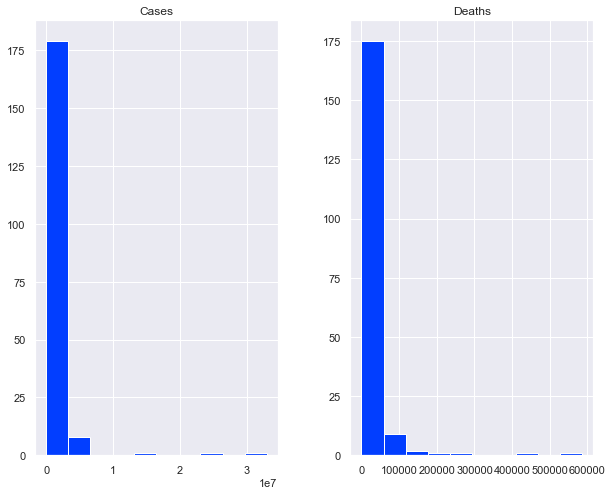

In [112]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

q7 = '''
select Cases, Deaths
from covid
'''
pd.read_sql_query(q7, conn).hist(ax=ax) #visualizing the distribution of cases and deaths 

These diagrams are clearly very right-skewed with outliers that have much greater number of cases and deaths. However, the data might be less skewed after we calculate the rates per 100,000 people. We will do this by merging data from the covid and population tables. 

In [113]:
q8 = """
SELECT c.*, p.Population, p.Code3, o.oecd, (cast(c.Cases as float)/cast(p.Population as float)) * 100000 Cases_per_100k, 
(cast(c.Deaths as float)/cast(p.Population as float)) * 100000 Deaths_per_100k 
FROM covid as c
LEFT JOIN population as p
ON c.Code = p.Code
LEFT JOIN oecd as o
on c.Code = o.Code
order by Cases_per_100k desc;
"""
covid_rates = pd.read_sql_query(q8, conn)
covid_rates.head(10)

,Country,Code,Cases,Deaths,Population,Code3,oecd,Cases_per_100k,Deaths_per_100k
0,Andorra,AD,13510,127,77000.0,AND,NaN,17545.454545,164.935065
1,Montenegro,ME,98852,1561,628000.0,MNE,NaN,15740.764331,248.566879
2,Czech Republic,CZ,1652840,29901,10689000.0,CZE,1.0,15462.999345,279.736177
3,San Marino,SM,5083,90,34000.0,SMR,NaN,14950.000000,264.705882
4,Bahrain,BH,200977,746,1641000.0,BHR,NaN,12247.227300,45.460085
5,Slovenia,SI,249310,4324,2079000.0,SVN,1.0,11991.822992,207.984608
6,Luxembourg,LU,68922,806,616000.0,LUX,1.0,11188.636364,130.844156
7,Sweden,SE,1037126,14275,10036000.0,SWE,1.0,10334.057393,142.237943
8,United States of America,US,32940846,585970,329064992.0,USA,1.0,10010.437695,178.071206
9,Israel,IL,839119,6382,8519000.0,ISR,1.0,9849.970654,74.914896


Let's also create a column with a dummy variable to indicate which countires are part of the OECD.

In [114]:
one_hot = pd.get_dummies(covid_rates['oecd'])
covid_rates = covid_rates.join(one_hot)
covid_rates.head(20)

,Country,Code,Cases,Deaths,Population,Code3,oecd,Cases_per_100k,Deaths_per_100k,1.0
0,Andorra,AD,13510,127,77000.0,AND,NaN,17545.454545,164.935065,0
1,Montenegro,ME,98852,1561,628000.0,MNE,NaN,15740.764331,248.566879,0
2,Czech Republic,CZ,1652840,29901,10689000.0,CZE,1.0,15462.999345,279.736177,1
3,San Marino,SM,5083,90,34000.0,SMR,NaN,14950.000000,264.705882,0
4,Bahrain,BH,200977,746,1641000.0,BHR,NaN,12247.227300,45.460085,0
5,Slovenia,SI,249310,4324,2079000.0,SVN,1.0,11991.822992,207.984608,1
6,Luxembourg,LU,68922,806,616000.0,LUX,1.0,11188.636364,130.844156,1
7,Sweden,SE,1037126,14275,10036000.0,SWE,1.0,10334.057393,142.237943,1
8,United States of America,US,32940846,585970,329064992.0,USA,1.0,10010.437695,178.071206,1
9,Israel,IL,839119,6382,8519000.0,ISR,1.0,9849.970654,74.914896,1


In [115]:
covid_rates.drop('oecd', axis = 1, inplace = True)
covid_rates.rename(columns = {1.0:'OECD'}, inplace = True)
covid_rates.head(20)

,Country,Code,Cases,Deaths,Population,Code3,Cases_per_100k,Deaths_per_100k,OECD
0,Andorra,AD,13510,127,77000.0,AND,17545.454545,164.935065,0
1,Montenegro,ME,98852,1561,628000.0,MNE,15740.764331,248.566879,0
2,Czech Republic,CZ,1652840,29901,10689000.0,CZE,15462.999345,279.736177,1
3,San Marino,SM,5083,90,34000.0,SMR,14950.000000,264.705882,0
4,Bahrain,BH,200977,746,1641000.0,BHR,12247.227300,45.460085,0
5,Slovenia,SI,249310,4324,2079000.0,SVN,11991.822992,207.984608,1
6,Luxembourg,LU,68922,806,616000.0,LUX,11188.636364,130.844156,1
7,Sweden,SE,1037126,14275,10036000.0,SWE,10334.057393,142.237943,1
8,United States of America,US,32940846,585970,329064992.0,USA,10010.437695,178.071206,1
9,Israel,IL,839119,6382,8519000.0,ISR,9849.970654,74.914896,1


In [116]:
covid_rates.isnull().sum()

Country            0
Code               0
Cases              0
Deaths             0
Population         1
Code3              1
Cases_per_100k     1
Deaths_per_100k    1
OECD               0
dtype: int64

After checking for null values in our new table, we can see there is one value missing for population. 

In [117]:
covid_rates[covid_rates['Population'].isnull()]

,Country,Code,Cases,Deaths,Population,Code3,Cases_per_100k,Deaths_per_100k,OECD
189,Republic of Kosovo,XK,106506,2230,NaN,None,NaN,NaN,0


In [118]:
q9 = """
SELECT * FROM population
WHERE Country LIKE '$Kos$';
"""
pd.read_sql_query(q9, conn)

,Country,Code3,Population,Code


In [119]:
covid_rates.dropna(subset=['Population'], inplace = True)
covid_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          189 non-null    object 
 1   Code             189 non-null    object 
 2   Cases            189 non-null    int64  
 3   Deaths           189 non-null    int64  
 4   Population       189 non-null    float64
 5   Code3            189 non-null    object 
 6   Cases_per_100k   189 non-null    float64
 7   Deaths_per_100k  189 non-null    float64
 8   OECD             189 non-null    uint8  
dtypes: float64(3), int64(2), object(3), uint8(1)
memory usage: 13.5+ KB


Now that we have no longer have null values, let's save the new table to the database.

In [120]:
covid_rates.to_sql('covid_rates', conn, if_exists="replace", index = False)
conn.commit()

## 4. Analysis/Visualisation

<ipython-input-121-41972dbd2c96>:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.read_sql_query(q10, conn).hist(ax=ax) #visualizing the distribution of cases and deaths per 100k


array([[<AxesSubplot:title={'center':'Cases_per_100k'}>,
        <AxesSubplot:title={'center':'Deaths_per_100k'}>]], dtype=object)

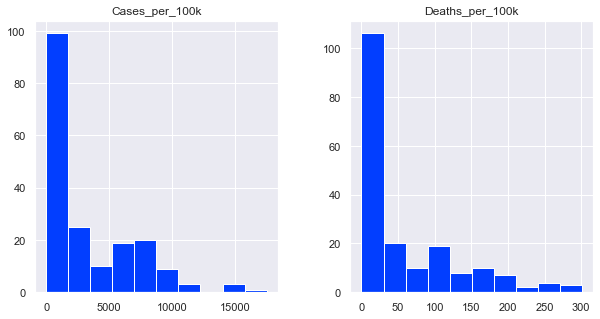

In [121]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

q10 = '''
select Cases_per_100k, Deaths_per_100k
from covid_rates
'''
pd.read_sql_query(q10, conn).hist(ax=ax) #visualizing the distribution of cases and deaths per 100k

There still seems to be quite a few outliers for both cases and death rates. Let's extract the dataframe again for further analysis.  

In [122]:
q11 = """
SELECT * FROM covid_rates;
"""
covid_rates = pd.read_sql_query(q11, conn)

In [123]:
covid_rates.describe()

,Cases,Deaths,Population,Cases_per_100k,Deaths_per_100k,OECD
count,1.890000e+02,189.000000,1.890000e+02,189.000000,189.000000,189.000000
mean,8.609351e+05,17855.513228,4.055977e+07,3240.626466,57.132828,0.195767
std,3.295621e+06,61597.892097,1.486525e+08,3769.163295,72.961704,0.397844
min,1.000000e+00,0.000000,1.000000e+03,0.877193,0.000000,0.000000
25%,1.143400e+04,150.000000,2.173000e+06,181.420850,2.724321,0.000000
50%,9.667000e+04,1222.000000,9.321000e+06,1590.478521,18.267420,0.000000
75%,3.875230e+05,7620.000000,2.916200e+07,6123.689791,99.913345,0.000000
max,3.294085e+07,585970.000000,1.433784e+09,17545.454545,301.239029,1.000000


This statistical summary shows us the mean and standard deviation of each of the features. Let's now use Folium to visualize the cases rates and death rates on world maps. 

I'll start by visualizing the cases per 100,000 people for each country. 

In [124]:
#Setting up the world countries data URL
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [125]:
m = folium.Map(location=[0, 0], zoom_start=1.5)
#Adding the Choropleth layer onto our base map
folium.Choropleth(
    geo_data=country_shapes,
    name='choropleth COVID-19',
    data=covid_rates,
    columns=['Code3', 'Cases_per_100k'],
    key_on='feature.id',
    fill_color='PuRd',
    nan_fill_color='black'
).add_to(m)
m

Next I'll plot the deaths per 100,000.

In [126]:
m = folium.Map(location=[0, 0], zoom_start=1.5)
#Adding the Choropleth layer onto our base map
folium.Choropleth(
    geo_data=country_shapes,
    name='choropleth COVID-19',
    data=covid_rates,
    columns=['Code3', 'Deaths_per_100k'],
    key_on='feature.id',
    fill_color='YlOrRd',
    nan_fill_color='black'
).add_to(m)
m

From the above maps, we can see that North America, South America and Europe seem to have much higher rates of cases and deaths compared to Asia, Africa and Australaisa. Now let's look at the countries with the highest rates of cases/deaths, plot the data on boxplots and find the z-scores to check if any of these outliers are significant. 

In [127]:
covid_rates = covid_rates.sort_values(by=['Cases_per_100k'], ascending = False)
covid_rates.head(20)

,Country,Code,Cases,Deaths,Population,Code3,Cases_per_100k,Deaths_per_100k,OECD
0,Andorra,AD,13510,127,77000.0,AND,17545.454545,164.935065,0
1,Montenegro,ME,98852,1561,628000.0,MNE,15740.764331,248.566879,0
2,Czech Republic,CZ,1652840,29901,10689000.0,CZE,15462.999345,279.736177,1
3,San Marino,SM,5083,90,34000.0,SMR,14950.000000,264.705882,0
4,Bahrain,BH,200977,746,1641000.0,BHR,12247.227300,45.460085,0
5,Slovenia,SI,249310,4324,2079000.0,SVN,11991.822992,207.984608,1
6,Luxembourg,LU,68922,806,616000.0,LUX,11188.636364,130.844156,1
7,Sweden,SE,1037126,14275,10036000.0,SWE,10334.057393,142.237943,1
8,United States of America,US,32940846,585970,329064992.0,USA,10010.437695,178.071206,1
9,Israel,IL,839119,6382,8519000.0,ISR,9849.970654,74.914896,1


<AxesSubplot:xlabel='Cases_per_100k', ylabel='Country'>

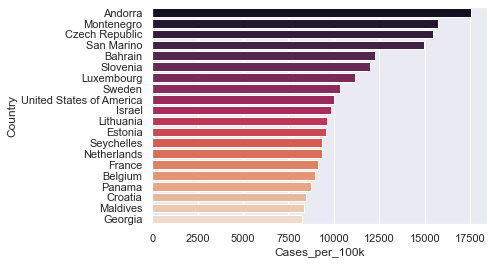

In [128]:
top20_cases = covid_rates.head(20)
sns.barplot(x=top20_cases['Cases_per_100k'], y=top20_cases['Country'], orient='h',
                 palette="rocket")

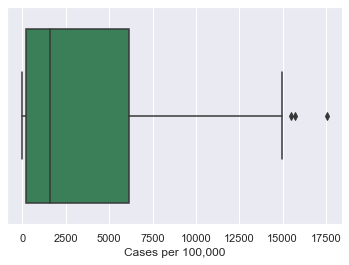

In [129]:
sns.boxplot(x=covid_rates['Cases_per_100k'], color='seagreen')
plt.xlabel('Cases per 100,000')

In [130]:
z = np.abs(st.zscore(covid_rates['Cases_per_100k'])) # getting the z-score for all countries.
threshold = 3
print(np.where(z > 3)) #checking if there are any countries with a z-score > 3

(array([0, 1, 2, 3], dtype=int64),)


In [131]:
covid_rates.iloc[0:4]

,Country,Code,Cases,Deaths,Population,Code3,Cases_per_100k,Deaths_per_100k,OECD
0,Andorra,AD,13510,127,77000.0,AND,17545.454545,164.935065,0
1,Montenegro,ME,98852,1561,628000.0,MNE,15740.764331,248.566879,0
2,Czech Republic,CZ,1652840,29901,10689000.0,CZE,15462.999345,279.736177,1
3,San Marino,SM,5083,90,34000.0,SMR,14950.000000,264.705882,0


There are four countries which have case rates that are more than 3 standard deviations away from the mean case rate of 3,233 cases per 100,000.  3 of these are very small nations - Andorra, Montenegro and San Marino, and there other country is Czech Republic, which is a member of the OECD. Although it's difficult to say whether these countries, especially Czech Republic should be be left in the dataframe or omitted, I have decided to drop these values as I think there is already quite a lot of noise in the data (which is likely to affect the hypothesis testing and regression analysis) without including extreme outliers. 

In [132]:
covid_rates = covid_rates.drop(labels = [0,1,2,3])
covid_rates

,Country,Code,Cases,Deaths,Population,Code3,Cases_per_100k,Deaths_per_100k,OECD
4,Bahrain,BH,200977,746,1641000.0,BHR,12247.227300,45.460085,0
5,Slovenia,SI,249310,4324,2079000.0,SVN,11991.822992,207.984608,1
6,Luxembourg,LU,68922,806,616000.0,LUX,11188.636364,130.844156,1
7,Sweden,SE,1037126,14275,10036000.0,SWE,10334.057393,142.237943,1
8,United States of America,US,32940846,585970,329064992.0,USA,10010.437695,178.071206,1
...,...,...,...,...,...,...,...,...,...
184,Solomon Islands,SB,20,0,670000.0,SLB,2.985075,0.000000,0
185,Samoa,WS,3,0,197000.0,WSM,1.522843,0.000000,0
186,Vanuatu,VU,4,1,300000.0,VUT,1.333333,0.333333,0
187,"Tanzania, United Republic of",TZ,509,21,58005000.0,TZA,0.877511,0.036204,0


In [133]:
covid_rates = covid_rates.sort_values(by=['Deaths_per_100k'], ascending = False)
covid_rates.head(20)

,Country,Code,Cases,Deaths,Population,Code3,Cases_per_100k,Deaths_per_100k,OECD
20,Hungary,HU,798147,29175,9685000.0,HUN,8241.063500,301.239029,1
47,Bosnia and Herzegovina,BA,202143,8981,3301000.0,BIH,6123.689791,272.069070,0
30,"Macedonia, Republic of",MK,154698,5211,2083000.0,MKD,7426.692271,250.168027,0
50,Bulgaria,BG,414192,17259,7000000.0,BGR,5917.028571,246.557143,0
35,Slovakia,SK,387523,12224,5457000.0,SVK,7101.392707,224.005864,1
15,Belgium,BE,1031923,24709,11539000.0,BEL,8942.915331,214.134674,1
5,Slovenia,SI,249310,4324,2079000.0,SVN,11991.822992,207.984608,1
31,Brazil,BR,15627243,435751,211050000.0,BRA,7404.521677,206.468136,0
39,Italy,IT,4159122,124156,60550000.0,ITA,6868.905037,205.047069,1
51,Peru,PE,1889052,66220,32510000.0,PER,5810.679791,203.691172,0


<AxesSubplot:xlabel='Deaths_per_100k', ylabel='Country'>

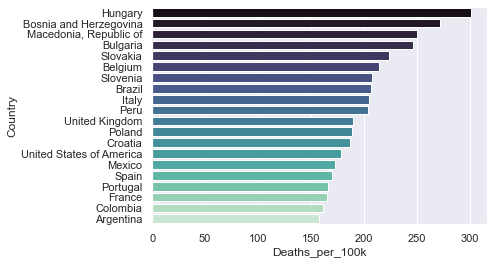

In [134]:
top20_deaths = covid_rates.head(20)
sns.barplot(x=top20_deaths['Deaths_per_100k'], y=top20_deaths['Country'], orient='h',
                 palette="mako")

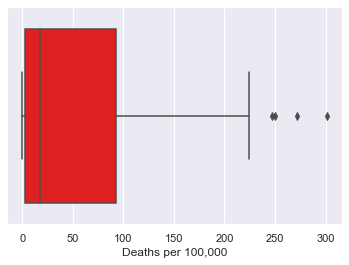

In [135]:
sns.boxplot(x=covid_rates['Deaths_per_100k'], color='red')
plt.xlabel('Deaths per 100,000')

In [136]:
z = np.abs(st.zscore(covid_rates['Deaths_per_100k'])) # getting the z-score for all countries.
threshold = 3
print(np.where(z > 3)) #checking if there are any countries with a z-score > 3

(array([0, 1], dtype=int64),)


In [137]:
covid_rates.iloc[0:2]

,Country,Code,Cases,Deaths,Population,Code3,Cases_per_100k,Deaths_per_100k,OECD
20,Hungary,HU,798147,29175,9685000.0,HUN,8241.063500,301.239029,1
47,Bosnia and Herzegovina,BA,202143,8981,3301000.0,BIH,6123.689791,272.069070,0


We can see there are two significant outliers for death rates, Hungary and Bosnia and Herzegonvina. Again I've made the decision to drop these rows, although admittedly I don't have the expertise to know if this is the correct decision, as it may cause the data to be more biased.

In [138]:
covid_rates = covid_rates.reset_index(drop = True)
covid_rates

,Country,Code,Cases,Deaths,Population,Code3,Cases_per_100k,Deaths_per_100k,OECD
0,Hungary,HU,798147,29175,9685000.0,HUN,8241.063500,301.239029,1
1,Bosnia and Herzegovina,BA,202143,8981,3301000.0,BIH,6123.689791,272.069070,0
2,"Macedonia, Republic of",MK,154698,5211,2083000.0,MKD,7426.692271,250.168027,0
3,Bulgaria,BG,414192,17259,7000000.0,BGR,5917.028571,246.557143,0
4,Slovakia,SK,387523,12224,5457000.0,SVK,7101.392707,224.005864,1
...,...,...,...,...,...,...,...,...,...
180,Dominica,DM,178,0,72000.0,DMA,247.222222,0.000000,0
181,Marshall Islands,MH,4,0,59000.0,MHL,6.779661,0.000000,0
182,Solomon Islands,SB,20,0,670000.0,SLB,2.985075,0.000000,0
183,Samoa,WS,3,0,197000.0,WSM,1.522843,0.000000,0


In [139]:
covid_rates = covid_rates.drop(labels = [0,1])
covid_rates = covid_rates.reset_index(drop = True)
covid_rates

,Country,Code,Cases,Deaths,Population,Code3,Cases_per_100k,Deaths_per_100k,OECD
0,"Macedonia, Republic of",MK,154698,5211,2083000.0,MKD,7426.692271,250.168027,0
1,Bulgaria,BG,414192,17259,7000000.0,BGR,5917.028571,246.557143,0
2,Slovakia,SK,387523,12224,5457000.0,SVK,7101.392707,224.005864,1
3,Belgium,BE,1031923,24709,11539000.0,BEL,8942.915331,214.134674,1
4,Slovenia,SI,249310,4324,2079000.0,SVN,11991.822992,207.984608,1
...,...,...,...,...,...,...,...,...,...
178,Dominica,DM,178,0,72000.0,DMA,247.222222,0.000000,0
179,Marshall Islands,MH,4,0,59000.0,MHL,6.779661,0.000000,0
180,Solomon Islands,SB,20,0,670000.0,SLB,2.985075,0.000000,0
181,Samoa,WS,3,0,197000.0,WSM,1.522843,0.000000,0


After making these changes, I'll resave the table to the database before I start the hypothesis testing.  

In [140]:
covid_rates.to_sql('covid_rates', conn, if_exists="replace", index = False)
conn.commit()

## Hypothesis Testing

For this section of the project, I will test the hypothesis that countries with female leaders have lower covid rates. First I will test the hypothesis for all countries, and then just for OECD countries. 

In [141]:
q12 = "SELECT * FROM femaleleaders LIMIT 5;"
pd.read_sql_query(q12,conn)

,Name,Country,Female_Leader,Code
0,Angela Merkel,Germany,Incumbent,DE
1,Sheikh Hasina,Bangladesh,Incumbent,BD
2,Erna Solberg,Norway,Incumbent,NO
3,Saara Kuugongelwa,Namibia,Incumbent,NA
4,Bidhya Devi Bhandari,Nepal,Incumbent,NP


In [142]:
q13 = """
SELECT c.Country, c.Code, c. Cases_per_100k, c.Deaths_per_100k, c.OECD, f.Female_Leader
FROM covid_rates as c
LEFT JOIN femaleleaders as f
ON c.Code = f.Code
order by Cases_per_100k desc;
"""
leader_variable = pd.read_sql_query(q13, conn)
leader_variable.head(20)

,Country,Code,Cases_per_100k,Deaths_per_100k,OECD,Female_Leader
0,Bahrain,BH,12247.227300,45.460085,0,None
1,Slovenia,SI,11991.822992,207.984608,1,None
2,Luxembourg,LU,11188.636364,130.844156,1,None
3,Sweden,SE,10334.057393,142.237943,1,None
4,United States of America,US,10010.437695,178.071206,1,None
5,Israel,IL,9849.970654,74.914896,1,None
6,Lithuania,LT,9620.869565,148.659420,1,None
7,Estonia,EE,9581.674208,92.156863,1,Incumbent
8,Seychelles,SC,9371.428571,32.653061,0,None
9,Netherlands,NL,9347.628239,102.058841,1,None


After extracting all the data I need, I will create a dummy column for the female leader variable. 

In [143]:
one_hot = pd.get_dummies(leader_variable['Female_Leader'])
leader_variable = leader_variable.join(one_hot)
leader_variable.head(20)

,Country,Code,Cases_per_100k,Deaths_per_100k,OECD,Female_Leader,Incumbent
0,Bahrain,BH,12247.227300,45.460085,0,None,0
1,Slovenia,SI,11991.822992,207.984608,1,None,0
2,Luxembourg,LU,11188.636364,130.844156,1,None,0
3,Sweden,SE,10334.057393,142.237943,1,None,0
4,United States of America,US,10010.437695,178.071206,1,None,0
5,Israel,IL,9849.970654,74.914896,1,None,0
6,Lithuania,LT,9620.869565,148.659420,1,None,0
7,Estonia,EE,9581.674208,92.156863,1,Incumbent,1
8,Seychelles,SC,9371.428571,32.653061,0,None,0
9,Netherlands,NL,9347.628239,102.058841,1,None,0


In [144]:
leader_variable.drop('Female_Leader', axis = 1, inplace = True)
leader_variable.rename(columns = {'Incumbent':'Female_Leader'}, inplace = True)
leader_variable.head(20)

,Country,Code,Cases_per_100k,Deaths_per_100k,OECD,Female_Leader
0,Bahrain,BH,12247.227300,45.460085,0,0
1,Slovenia,SI,11991.822992,207.984608,1,0
2,Luxembourg,LU,11188.636364,130.844156,1,0
3,Sweden,SE,10334.057393,142.237943,1,0
4,United States of America,US,10010.437695,178.071206,1,0
5,Israel,IL,9849.970654,74.914896,1,0
6,Lithuania,LT,9620.869565,148.659420,1,0
7,Estonia,EE,9581.674208,92.156863,1,1
8,Seychelles,SC,9371.428571,32.653061,0,0
9,Netherlands,NL,9347.628239,102.058841,1,0


Let's check if there is any correlation between female leaders and cases or deaths.

In [145]:
leader_variable.corr()

,Cases_per_100k,Deaths_per_100k,OECD,Female_Leader
Cases_per_100k,1.000000,0.794873,0.474376,0.021100
Deaths_per_100k,0.794873,1.000000,0.478125,-0.019217
OECD,0.474376,0.478125,1.000000,0.244426
Female_Leader,0.021100,-0.019217,0.244426,1.000000


These results show a small positive correlation between cases and female leaders, meaning these countries are more likely to have higher cases per 100k, and a small negative correlation between deaths and female leaders. Let's save the new table to the database and carry out further analysis.

In [146]:
leader_variable.to_sql('femaleleaders', conn, if_exists="replace", index = False)

In [147]:
q14 = """
SELECT Female_Leader, COUNT(Country) Number_of_Countries_Globally, AVG(Cases_per_100k) Avg_Cases_per_100k, AVG(Deaths_per_100k) Avg_Deaths_per_100k 
FROM femaleleaders
GROUP BY Female_Leader
"""
compare_leaders = pd.read_sql_query(q14, conn)
compare_leaders

,Female_Leader,Number_of_Countries_Globally,Avg_Cases_per_100k,Avg_Deaths_per_100k
0,0,164,2896.725142,51.056272
1,1,19,3123.763543,47.032833


Text(0.5, 1.0, 'Comparing Deaths per 100k for All Countries')

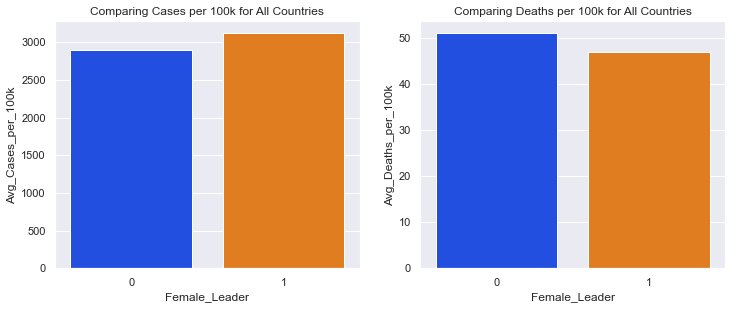

In [148]:
plt.figure(figsize=(12,10))

plt.subplot(2, 2, 1)
sns.barplot(x='Female_Leader', y='Avg_Cases_per_100k', data=compare_leaders)
plt.title('Comparing Cases per 100k for All Countries')
plt.subplot(2, 2, 2)
sns.barplot(x='Female_Leader', y='Avg_Deaths_per_100k', data=compare_leaders)
plt.title('Comparing Deaths per 100k for All Countries')


Here we can see that the 19 countries which have female leaders have a slightly higher average for case rates. but a slightly lower average for death rates, compared to countries with male leaders.

I'll now extract the data into two tables, male leaders and female leaders, to compare the two samples.

In [150]:
q15 = """
SELECT *
FROM femaleleaders
WHERE Female_Leader == 0
"""
m_leaders = pd.read_sql_query(q15, conn)
m_leaders

,Country,Code,Cases_per_100k,Deaths_per_100k,OECD,Female_Leader
0,Bahrain,BH,12247.227300,45.460085,0,0
1,Slovenia,SI,11991.822992,207.984608,1,0
2,Luxembourg,LU,11188.636364,130.844156,1,0
3,Sweden,SE,10334.057393,142.237943,1,0
4,United States of America,US,10010.437695,178.071206,1,0
...,...,...,...,...,...,...
159,Solomon Islands,SB,2.985075,0.000000,0,0
160,Samoa,WS,1.522843,0.000000,0,0
161,Vanuatu,VU,1.333333,0.333333,0,0
162,"Tanzania, United Republic of",TZ,0.877511,0.036204,0,0


In [151]:
q16 = """
SELECT *
FROM femaleleaders
WHERE Female_Leader == 1
"""
f_leaders = pd.read_sql_query(q16, conn)
f_leaders

,Country,Code,Cases_per_100k,Deaths_per_100k,OECD,Female_Leader
0,Estonia,EE,9581.674208,92.156863,1,1
1,Georgia,GE,8265.574181,111.133350,0,1
2,Serbia,RS,8053.556772,76.162791,0,1
3,Slovakia,SK,7101.392707,224.005864,1,1
4,Denmark,DK,4629.313929,43.364518,1,1
5,Germany,DE,4314.018703,103.171809,1,1
6,Greece,GR,3600.591998,108.994557,1,1
7,Norway,NO,2217.865774,14.389292,1,1
8,Namibia,NA,2052.825651,28.777555,0,1
9,Iceland,IS,1928.318584,8.554572,1,1


In order to compare the means of the two sample, we need to determine whether a parametric or non-parametric test is more suitable. 

If the samples are normally distributed with few outliers, we can use a parametric test such as a paired T-test, if not a non-parametric test may be more suitable. So, let's first check for normality. 

C:\Users\user\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cases_per_100k', ylabel='Density'>

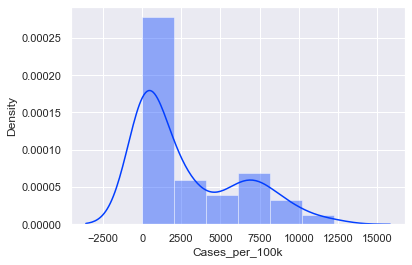

In [152]:
sns.distplot(m_leaders['Cases_per_100k'])

C:\Users\user\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cases_per_100k', ylabel='Density'>

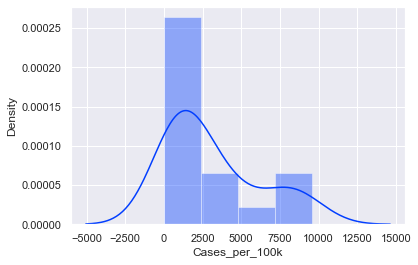

In [153]:
sns.distplot(f_leaders['Cases_per_100k'])

Neither of these samples look normally distributed from the distribution graphs. I will now try to transform the data using QuantileTransformer to see if we can change them into Gaussian (normal) distributions.

C:\Users\user\.conda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (164). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


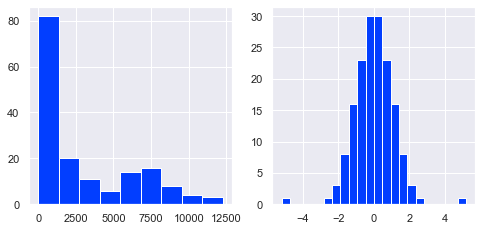

In [154]:
from sklearn.preprocessing import QuantileTransformer

m_array = m_leaders['Cases_per_100k'].to_numpy()
f_array = f_leaders['Cases_per_100k'].to_numpy()

qt = QuantileTransformer(output_distribution='normal')
m_transformed = qt.fit_transform(m_array.reshape(-1, 1))

plt.figure(figsize=(8,8))
plt.subplot(2, 2, 1)
plt.hist(m_leaders['Cases_per_100k'], bins='auto')
plt.subplot(2, 2, 2)
plt.hist(m_transformed, bins='auto')
plt.show()

C:\Users\user\.conda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (19). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


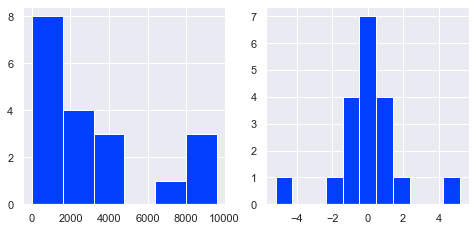

In [155]:
qt = QuantileTransformer(output_distribution='normal')
f_transformed = qt.fit_transform(f_array.reshape(-1, 1))
plt.figure(figsize=(8,8))

plt.subplot(2, 2, 1)
plt.hist(f_leaders['Cases_per_100k'], bins='auto')
plt.subplot(2, 2, 2)
plt.hist(f_transformed, bins='auto')
plt.show()

Above we can see the differences between the data before and after transformation. Now let's use the Shapiro-Wilk test to test each sample for normality.

In [156]:
from scipy.stats import shapiro
stat, p = shapiro(m_transformed)
print(f"W-statistic = {stat}, p-value = {p}")
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

W-statistic = 0.956257700920105, p-value = 5.206375863053836e-05
Sample does not look Gaussian (reject H0)


In [157]:
stat, p = shapiro(f_transformed)
print(f"W-statistic = {stat}, p-value = {p}")
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

W-statistic = 0.8641831278800964, p-value = 0.011513370089232922
Sample does not look Gaussian (reject H0)


Even afer transforming the data, neither sample is normally distributed. 

So instead of using a parametric test, I will use the Mann-Whitney U test, which is a non-parametric test that is used to test the null hypothesis H0 that the distributions of two samples are equal. 

In [158]:
from scipy.stats import mannwhitneyu
world_cases_results = mannwhitneyu(m_leaders['Cases_per_100k'], f_leaders['Cases_per_100k'])
world_cases_results

MannwhitneyuResult(statistic=1345.0, pvalue=0.16548315480058046)

In [159]:
world_death_results = mannwhitneyu(m_leaders['Deaths_per_100k'], f_leaders['Deaths_per_100k'])
world_death_results

MannwhitneyuResult(statistic=1492.0, pvalue=0.38221630403300383)

The p-values for each of these tests are greater than 0.05, so we cannot reject the null hypothesis that countries with female leaders have the same level of COVID-19 case rates and death rates as countries with male leaders. 

Therefore, globally there is not a significant difference in COVID-19 rates between countries with female leaders and countries with male leaders.

Next, we will test the hypothesis in the same way for just OECD countries. 

In [160]:
q17 = """
SELECT Female_Leader, COUNT(Country) Number_of_OECD_Countries, AVG(Cases_per_100k) Avg_Cases_per_100k, AVG(Deaths_per_100k) Avg_Deaths_per_100k 
FROM femaleleaders
WHERE OECD == 1
GROUP BY Female_Leader
"""
compare_oecd_leaders = pd.read_sql_query(q17, conn)
compare_oecd_leaders

,Female_Leader,Number_of_OECD_Countries,Avg_Cases_per_100k,Avg_Deaths_per_100k
0,0,26,6892.764976,129.154459
1,1,9,3895.266385,68.001158


Text(0.5, 1.0, 'Comparing Deaths per 100k for OECD Countries')

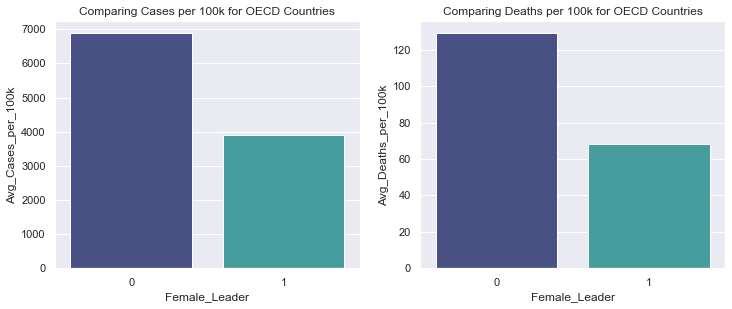

In [161]:
plt.figure(figsize=(12,10))

plt.subplot(2, 2, 1)
sns.barplot(x='Female_Leader', y='Avg_Cases_per_100k', data=compare_oecd_leaders, palette='mako')
plt.title('Comparing Cases per 100k for OECD Countries')
plt.subplot(2, 2, 2)
sns.barplot(x='Female_Leader', y='Avg_Deaths_per_100k', data=compare_oecd_leaders, palette='mako')
plt.title('Comparing Deaths per 100k for OECD Countries')


The table and bar charts with countries that are members of the OECD show lower rates of confirmed cases and deaths for countries with female leaders.

In [162]:
q18 = """
SELECT Country, Cases_per_100k, Deaths_per_100k
from femaleleaders
WHERE Female_Leader == 1 and OECD == 1
order by Cases_per_100k desc;
"""
f_oecd_leaders = pd.read_sql_query(q18, conn)
f_oecd_leaders

,Country,Cases_per_100k,Deaths_per_100k
0,Estonia,9581.674208,92.156863
1,Slovakia,7101.392707,224.005864
2,Denmark,4629.313929,43.364518
3,Germany,4314.018703,103.171809
4,Greece,3600.591998,108.994557
5,Norway,2217.865774,14.389292
6,Iceland,1928.318584,8.554572
7,Finland,1628.796095,16.829356
8,New Zealand,55.425465,0.543592


C:\Users\user\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Female OECD Leaders - Deaths per 100k')

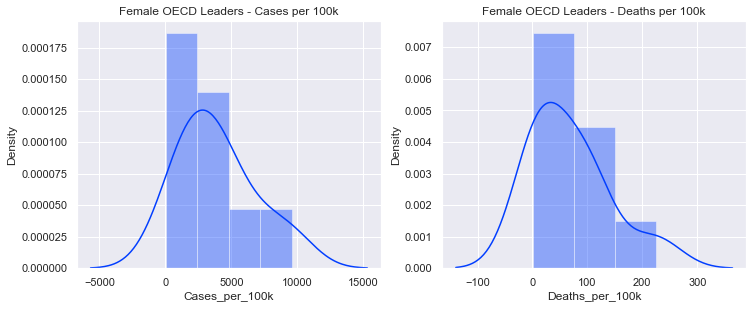

In [163]:
plt.figure(figsize=(12,10))

plt.subplot(2, 2, 1)
sns.distplot(f_oecd_leaders['Cases_per_100k'])
plt.title('Female OECD Leaders - Cases per 100k')
plt.subplot(2, 2, 2)
sns.distplot(f_oecd_leaders['Deaths_per_100k'])
plt.title('Female OECD Leaders - Deaths per 100k')

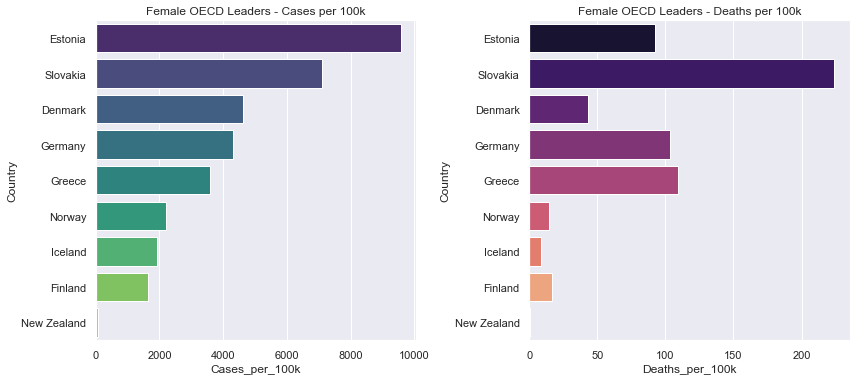

In [164]:
plt.figure(figsize=(12,10))

plt.subplot(2, 2, 1)
sns.barplot(x='Cases_per_100k', y='Country', data=f_oecd_leaders, orient='h', palette='viridis')
plt.title('Female OECD Leaders - Cases per 100k')
plt.subplot(2, 2, 2)
sns.barplot(x='Deaths_per_100k', y='Country', data=f_oecd_leaders, orient='h', palette='magma')
plt.title('Female OECD Leaders - Deaths per 100k')
plt.tight_layout()

From the bar chart, it's clear that New Zealand has been quite exceptional successful in preventing the the spread of the virus. 

In [165]:
q19 = """
SELECT Country, Cases_per_100k, Deaths_per_100k
from femaleleaders
WHERE Female_Leader == 0 and OECD == 1
order by Cases_per_100k desc;
"""
m_oecd_leaders = pd.read_sql_query(q19, conn)
m_oecd_leaders

,Country,Cases_per_100k,Deaths_per_100k
0,Slovenia,11991.822992,207.984608
1,Luxembourg,11188.636364,130.844156
2,Sweden,10334.057393,142.237943
3,United States of America,10010.437695,178.071206
4,Israel,9849.970654,74.914896
5,Lithuania,9620.869565,148.659420
6,Netherlands,9347.628239,102.058841
7,France,9118.714878,165.479810
8,Belgium,8942.915331,214.134674
9,Portugal,8235.693331,166.311363


C:\Users\user\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male OECD Leaders - Deaths per 100k')

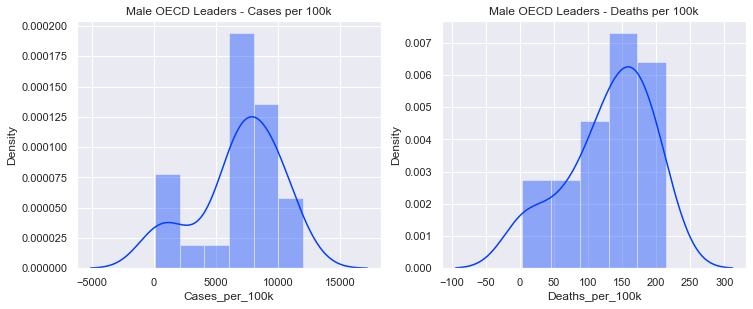

In [166]:
plt.figure(figsize=(12,10))

plt.subplot(2, 2, 1)
sns.distplot(m_oecd_leaders['Cases_per_100k'])
plt.title('Male OECD Leaders - Cases per 100k')
plt.subplot(2, 2, 2)
sns.distplot(m_oecd_leaders['Deaths_per_100k'])
plt.title('Male OECD Leaders - Deaths per 100k')

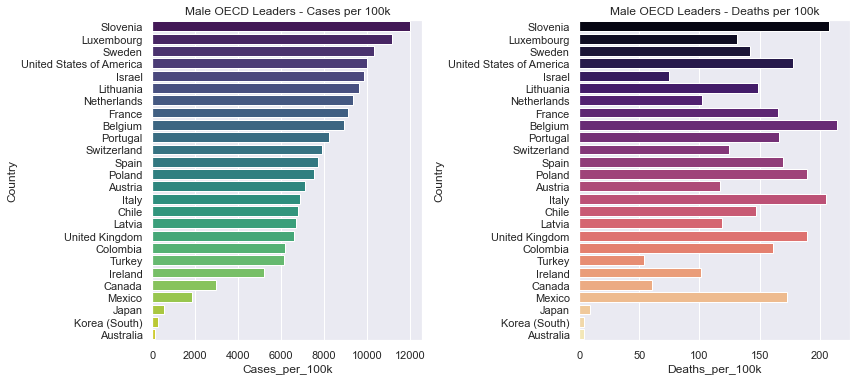

In [167]:
plt.figure(figsize=(12,10))

plt.subplot(2, 2, 1)
sns.barplot(x='Cases_per_100k', y='Country', data=m_oecd_leaders, orient='h', palette='viridis')
plt.title('Male OECD Leaders - Cases per 100k')
plt.subplot(2, 2, 2)
sns.barplot(x='Deaths_per_100k', y='Country', data=m_oecd_leaders, orient='h', palette='magma')
plt.title('Male OECD Leaders - Deaths per 100k')
plt.tight_layout()

Here we can see that New Zeland's neighbour Australia has also managed to eep the case and death rates exceedingly low. It's also interesting here to see that although Mexico has one of the lowest case rates, its death rate is one of the highest. 

Now let's again use the Mann-Whitney U test to test the null hypothesis that both samples have the mean for case rates and deaths rates.

In [168]:
oecd_cases_results = mannwhitneyu(m_oecd_leaders['Cases_per_100k'], f_oecd_leaders['Cases_per_100k'])
oecd_cases_results

MannwhitneyuResult(statistic=58.0, pvalue=0.01362422044615295)

In [169]:
oecd_deaths_results = mannwhitneyu(m_oecd_leaders['Deaths_per_100k'], f_oecd_leaders['Deaths_per_100k'])
oecd_deaths_results

MannwhitneyuResult(statistic=59.0, pvalue=0.014995938066516513)

With a p-value of 0.014 for the test comparing case rates of OECD countries lead by female leaders versus male leaders, and a p-value of 0.015 for the test comparing death rates, we can reject both null hypotheses at a significance level of 0.05. 

And we can accept the alternative hypotheses that OECD countries with female leaders have lower levels of confirmed COID-19 cases and deaths compared to OECD countries with male leaders. 

## Regression Analysis

For this regression analysis, I will first build a multiple linear regression model using Tensorflow, and then use SkLearn to build another model to compare. 


The first step to building a model is to look at the features. The target variable will be either cases_per_100k or deaths_per_100k, and the dependent variables will be the share of deaths attributed to obesity, the share of deaths attributed to smoking, average life expectancy and the categorial variable of whether the country is a member of the OECD or not. 

In [170]:
q = "SELECT * FROM obesity LIMIT 5;"

pd.read_sql_query(q,conn)

,Country,Obesity,Code
0,Bahrain,25.69,BH
1,American Samoa,23.53,AS
2,Kuwait,21.45,KW
3,Guam,21.13,GU
4,Egypt,20.52,EG


In [171]:
q = "SELECT * FROM smoking LIMIT 5;"

pd.read_sql_query(q,conn)

,Country,Smoking,Code
0,Montenegro,26.50,ME
1,Greenland,26.23,GL
2,Bosnia and Herzegovina,22.92,BA
3,North Macedonia,22.39,MK
4,Denmark,21.58,DK


In [172]:
q = "SELECT * FROM lifeexp LIMIT 5;"

pd.read_sql_query(q,conn)

,Country,Life_Expectancy,Code
0,Monaco,86.751,MC
1,San Marino,84.972,SM
2,Hong Kong,84.857,HK
3,Japan,84.629,JP
4,Macao,84.244,MO


In [173]:
q20 = """
SELECT c.Country, c.Cases_per_100k, c.Deaths_per_100k, c.OECD, o.Obesity, s.Smoking, l.Life_Expectancy
FROM covid_rates as c
LEFT JOIN obesity as o
ON c.Code = o.Code
LEFT JOIN smoking as s
ON c.Code = s.Code
LEFT JOIN lifeexp as l
ON c.Code = l.Code
order by Deaths_per_100k desc;
"""
covid_factors = pd.read_sql_query(q20, conn)
covid_factors.head()

,Country,Cases_per_100k,Deaths_per_100k,OECD,Obesity,Smoking,Life_Expectancy
0,"Macedonia, Republic of",7426.692271,250.168027,0,16.98,22.39,75.797
1,Bulgaria,5917.028571,246.557143,0,17.17,18.86,75.046
2,Slovakia,7101.392707,224.005864,1,15.88,15.61,77.542
3,Belgium,8942.915331,214.134674,1,8.14,18.44,81.628
4,Slovenia,11991.822992,207.984608,1,12.26,14.89,81.324


We now have our dataframe with all the necessary data, but before proceeding let's check if there are any null values.

In [174]:
covid_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          183 non-null    object 
 1   Cases_per_100k   183 non-null    float64
 2   Deaths_per_100k  183 non-null    float64
 3   OECD             183 non-null    int64  
 4   Obesity          177 non-null    float64
 5   Smoking          178 non-null    float64
 6   Life_Expectancy  183 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.1+ KB


In [175]:
covid_factors[covid_factors['Obesity'].isnull()]

,Country,Cases_per_100k,Deaths_per_100k,OECD,Obesity,Smoking,Life_Expectancy
18,Liechtenstein,7855.263158,152.631579,0,NaN,NaN,82.494
49,Monaco,6392.307692,82.051282,0,NaN,NaN,86.751
166,Fiji,19.325843,0.449438,0,NaN,12.21,67.444
176,Saint Kitts and Nevis,84.905660,0.000000,0,NaN,NaN,76.226
177,Holy See (Vatican City State),2700.000000,0.000000,0,NaN,NaN,75.125
182,"Micronesia, Federated States of",0.877193,0.000000,0,NaN,NaN,67.883


We will drop all of these null values from the dataframe. 

In [176]:
covid_factors.dropna(subset=['Obesity'], inplace = True)
covid_factors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 181
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          177 non-null    object 
 1   Cases_per_100k   177 non-null    float64
 2   Deaths_per_100k  177 non-null    float64
 3   OECD             177 non-null    int64  
 4   Obesity          177 non-null    float64
 5   Smoking          177 non-null    float64
 6   Life_Expectancy  177 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 11.1+ KB


In [177]:
covid_factors.describe()

,Cases_per_100k,Deaths_per_100k,OECD,Obesity,Smoking,Life_Expectancy
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,2922.947746,51.026667,0.197740,10.239322,10.102260,72.470345
std,3294.219379,64.171408,0.399425,5.205765,5.470903,7.544910
min,0.877511,0.000000,0.000000,1.360000,0.850000,53.283000
25%,181.420850,2.750418,0.000000,6.140000,5.400000,67.041000
50%,1471.392801,17.750215,0.000000,10.280000,10.190000,73.767000
75%,5601.049921,92.156863,0.000000,14.310000,14.580000,77.861000
max,12247.227300,250.168027,1.000000,25.690000,22.390000,84.629000


Now let's find the pairwise correlation of all columns in the dataframe.

In [178]:
covid_factors.corr()

,Cases_per_100k,Deaths_per_100k,OECD,Obesity,Smoking,Life_Expectancy
Cases_per_100k,1.000000,0.791006,0.483489,0.456118,0.544027,0.594516
Deaths_per_100k,0.791006,1.000000,0.484152,0.365690,0.483628,0.498317
OECD,0.483489,0.484152,1.000000,0.068652,0.428814,0.566425
Obesity,0.456118,0.365690,0.068652,1.000000,0.485974,0.556934
Smoking,0.544027,0.483628,0.428814,0.485974,1.000000,0.724225
Life_Expectancy,0.594516,0.498317,0.566425,0.556934,0.724225,1.000000


<AxesSubplot:>

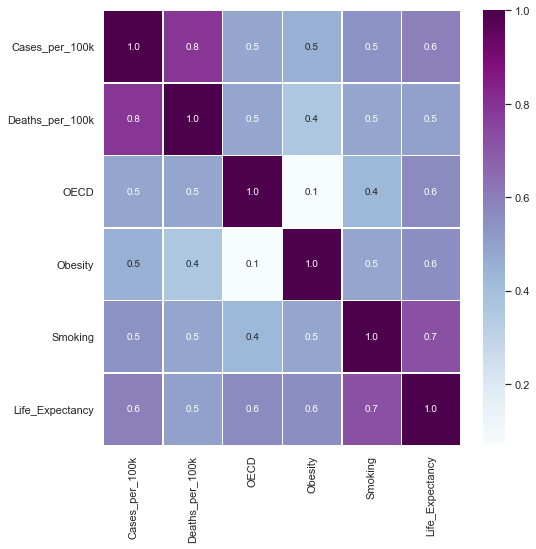

In [179]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(covid_factors.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="BuPu")

Looking at the table and heatmap, we can see that there is a slightly stronger correlation between the independent variables (except for OECD) and case rates over death rates. For this reason, I will choose cases per 100,000 as the target variable for the regression model. OECD, obesity and smoking each have a correlation of 0.5 with the case rate and life expectancy has a correlation of 0.6 with the case rate.  

It also appears that there might be a multicollinearity problem with the data, as the independent variables are also correlated quite strongly with each other. I will leave each of the indpendent variables for this project though, as I am just beginning to learn about statistical analysis and machine learning. 

Next I will visualize the relationship between each pair of variables using a pairplot. 

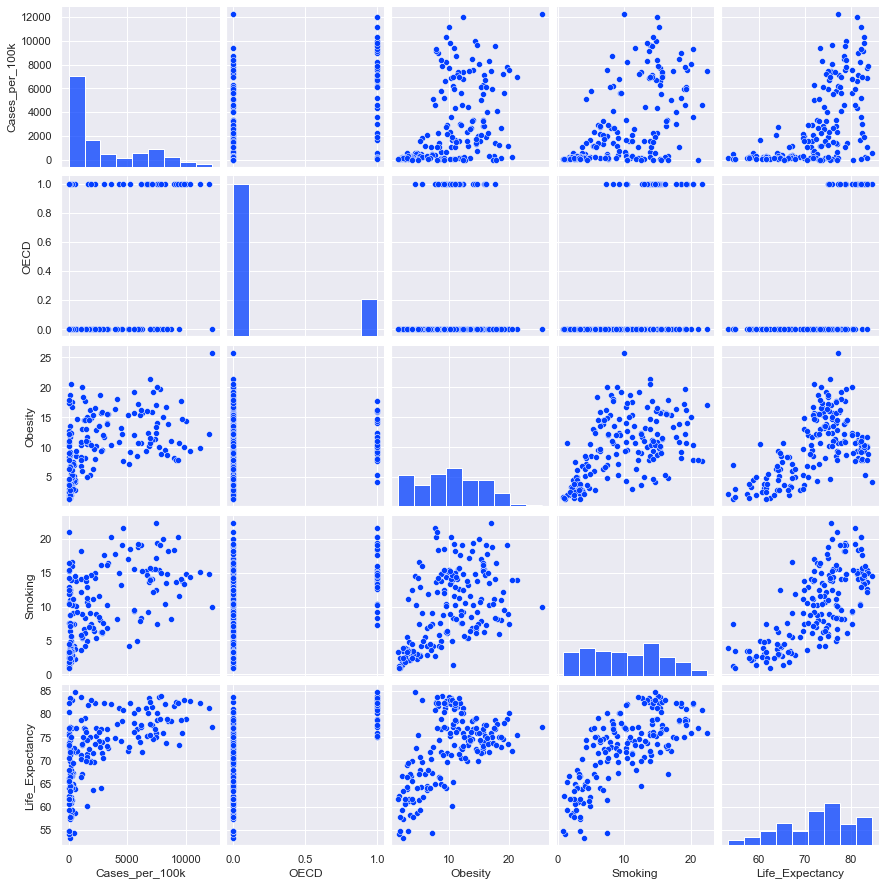

In [180]:
sns.pairplot(covid_factors[['Cases_per_100k', 'OECD', 'Obesity', 'Smoking', 'Life_Expectancy']])

The distribution of our dependent variable is clearly not normal, so I will transform the target using a log transformation to attempt to create more linear relationships between the target and the independent variables.

In [181]:
log_cases = np.log(covid_factors['Cases_per_100k'])
covid_factors['Log_Cases'] = log_cases
covid_factors

,Country,Cases_per_100k,Deaths_per_100k,OECD,Obesity,Smoking,Life_Expectancy,Log_Cases
0,"Macedonia, Republic of",7426.692271,250.168027,0,16.98,22.39,75.797,8.912836
1,Bulgaria,5917.028571,246.557143,0,17.17,18.86,75.046,8.685590
2,Slovakia,7101.392707,224.005864,1,15.88,15.61,77.542,8.868046
3,Belgium,8942.915331,214.134674,1,8.14,18.44,81.628,9.098617
4,Slovenia,11991.822992,207.984608,1,12.26,14.89,81.324,9.391980
...,...,...,...,...,...,...,...,...
175,Lao PDR,22.192774,0.027898,0,6.35,11.80,67.923,3.099767
178,Dominica,247.222222,0.000000,0,12.41,5.57,75.000,5.510288
179,Marshall Islands,6.779661,0.000000,0,17.30,10.38,73.696,1.913927
180,Solomon Islands,2.985075,0.000000,0,12.23,12.42,72.996,1.093625


<AxesSubplot:xlabel='Obesity', ylabel='Log_Cases'>

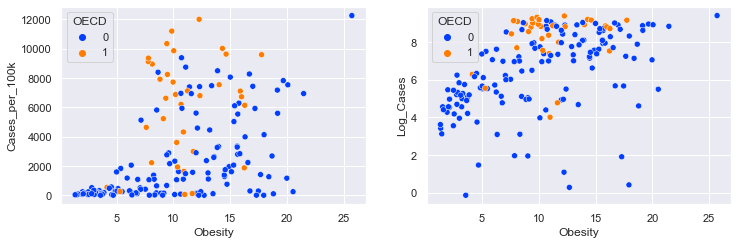

In [182]:
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Obesity', y='Cases_per_100k', data=covid_factors, hue='OECD')
plt.subplot(2, 2, 2)
sns.scatterplot(x='Obesity', y='Log_Cases', data=covid_factors, hue='OECD')

<AxesSubplot:xlabel='Smoking', ylabel='Log_Cases'>

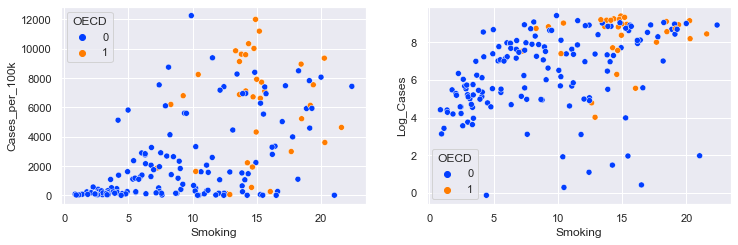

In [183]:
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Smoking', y='Cases_per_100k', data=covid_factors, hue='OECD')
plt.subplot(2, 2, 2)
sns.scatterplot(x='Smoking', y='Log_Cases', data=covid_factors, hue='OECD')

<AxesSubplot:xlabel='Life_Expectancy', ylabel='Log_Cases'>

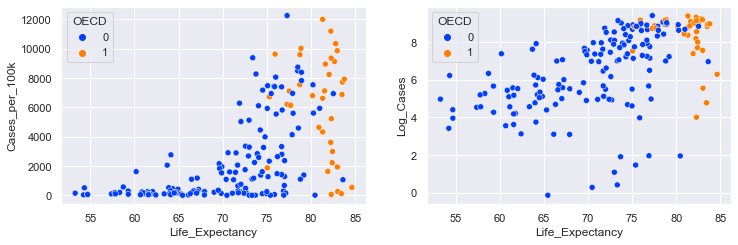

In [184]:
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Life_Expectancy', y='Cases_per_100k', data=covid_factors, hue='OECD')
plt.subplot(2, 2, 2)
sns.scatterplot(x='Life_Expectancy', y='Log_Cases', data=covid_factors, hue='OECD')

Although there seems to be a bit more linearity with the log transformed target, there are still lots of outliers. So for the  regression analysis,  I have decided to create different multiple linear regressions models (using Tensorflow and then scikit-learn) with the untransformed target and the log transformed target, and finally I will compare the results.

### Tensorflow Regression

**Model 1 - TF Regression - Cases per 100k (no transformation)**

In [185]:
#importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [186]:
X = covid_factors[['OECD','Obesity', 'Smoking', 'Life_Expectancy']]
y = covid_factors[['Cases_per_100k']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [187]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [188]:
X_train.shape

(141, 4)

In [189]:
X_test.shape

(36, 4)

In [190]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [191]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),epochs=500)

Epoch 1/500
5/5 [==============================] - 2s 349ms/step - loss: 17207466.0000 - val_loss: 27662774.0000
Epoch 2/500
5/5 [==============================] - 0s 42ms/step - loss: 17207074.0000 - val_loss: 27662220.0000
Epoch 3/500
5/5 [==============================] - 0s 39ms/step - loss: 17206656.0000 - val_loss: 27661676.0000
Epoch 4/500
5/5 [==============================] - 0s 28ms/step - loss: 17206226.0000 - val_loss: 27661034.0000
Epoch 5/500
5/5 [==============================] - 0s 15ms/step - loss: 17205734.0000 - val_loss: 27660298.0000
Epoch 6/500
5/5 [==============================] - 0s 16ms/step - loss: 17205150.0000 - val_loss: 27659428.0000
Epoch 7/500
5/5 [==============================] - 0s 13ms/step - loss: 17204460.0000 - val_loss: 27658380.0000
Epoch 8/500
5/5 [==============================] - 0s 14ms/step - loss: 17203658.0000 - val_loss: 27657094.0000
Epoch 9/500
5/5 [==============================] - 0s 13ms/step - loss: 17202664.0000 - val_loss: 27655

Epoch 146/500
5/5 [==============================] - 0s 15ms/step - loss: 5469700.5000 - val_loss: 10420010.0000
Epoch 147/500
5/5 [==============================] - 0s 15ms/step - loss: 5456214.0000 - val_loss: 10396940.0000
Epoch 148/500
5/5 [==============================] - 0s 15ms/step - loss: 5443617.0000 - val_loss: 10356560.0000
Epoch 149/500
5/5 [==============================] - 0s 13ms/step - loss: 5434091.0000 - val_loss: 10296612.0000
Epoch 150/500
5/5 [==============================] - 0s 14ms/step - loss: 5423580.5000 - val_loss: 10262176.0000
Epoch 151/500
5/5 [==============================] - 0s 14ms/step - loss: 5413809.0000 - val_loss: 10279352.0000
Epoch 152/500
5/5 [==============================] - 0s 13ms/step - loss: 5398493.5000 - val_loss: 10293379.0000
Epoch 153/500
5/5 [==============================] - 0s 14ms/step - loss: 5391717.0000 - val_loss: 10318138.0000
Epoch 154/500
5/5 [==============================] - 0s 13ms/step - loss: 5378086.5000 - val_los

5/5 [==============================] - 0s 14ms/step - loss: 4944218.5000 - val_loss: 10321284.0000
Epoch 291/500
5/5 [==============================] - 0s 13ms/step - loss: 4942597.5000 - val_loss: 10333806.0000
Epoch 292/500
5/5 [==============================] - 0s 12ms/step - loss: 4942300.5000 - val_loss: 10340300.0000
Epoch 293/500
5/5 [==============================] - 0s 13ms/step - loss: 4939856.5000 - val_loss: 10359779.0000
Epoch 294/500
5/5 [==============================] - 0s 12ms/step - loss: 4938553.5000 - val_loss: 10392615.0000
Epoch 295/500
5/5 [==============================] - 0s 13ms/step - loss: 4940013.5000 - val_loss: 10402492.0000
Epoch 296/500
5/5 [==============================] - 0s 12ms/step - loss: 4937730.5000 - val_loss: 10378928.0000
Epoch 297/500
5/5 [==============================] - 0s 12ms/step - loss: 4935865.0000 - val_loss: 10375759.0000
Epoch 298/500
5/5 [==============================] - 0s 12ms/step - loss: 4934777.5000 - val_loss: 10372312.00

5/5 [==============================] - 0s 13ms/step - loss: 4844058.5000 - val_loss: 10298588.0000
Epoch 435/500
5/5 [==============================] - 0s 13ms/step - loss: 4841721.0000 - val_loss: 10302219.0000
Epoch 436/500
5/5 [==============================] - 0s 12ms/step - loss: 4841741.5000 - val_loss: 10286380.0000
Epoch 437/500
5/5 [==============================] - 0s 12ms/step - loss: 4841407.5000 - val_loss: 10284041.0000
Epoch 438/500
5/5 [==============================] - 0s 13ms/step - loss: 4839960.5000 - val_loss: 10288508.0000
Epoch 439/500
5/5 [==============================] - 0s 12ms/step - loss: 4839876.0000 - val_loss: 10287274.0000
Epoch 440/500
5/5 [==============================] - 0s 12ms/step - loss: 4840038.5000 - val_loss: 10294450.0000
Epoch 441/500
5/5 [==============================] - 0s 13ms/step - loss: 4844169.5000 - val_loss: 10267569.0000
Epoch 442/500
5/5 [==============================] - 0s 12ms/step - loss: 4840447.0000 - val_loss: 10261180.00

<AxesSubplot:>

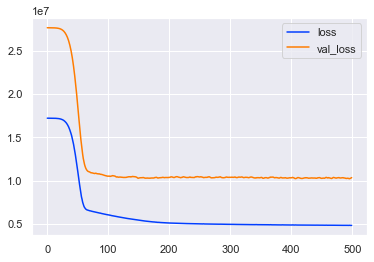

In [192]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [193]:
predictions = model.predict(X_test)

Text(0.5, 1.0, 'Tensorflow Model 1')

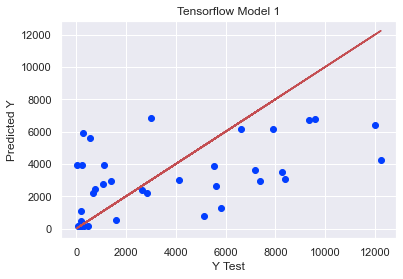

In [194]:
# Our predictions
plt.scatter(y_test,predictions)
# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Tensorflow Model 1')


In [195]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [196]:
tf1_mae = mean_absolute_error(y_test,predictions)
tf1_rmse = np.sqrt(mean_squared_error(y_test,predictions))
tf1_evs = explained_variance_score(y_test,predictions)
print('Mean Absolute Error: ', tf1_mae)
print('Root Mean Square Error: ', tf1_rmse)
print('Explained Variance Score: ', tf1_evs)

Mean Absolute Error:  2480.562607360339
Root Mean Square Error:  3215.2447656566956
Explained Variance Score:  0.2943420120827782


In [197]:
covid_factors['Cases_per_100k'].mean()

2922.9477461241163

In [198]:
covid_factors['Cases_per_100k'].median()

1471.3928012519561

C:\Users\user\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

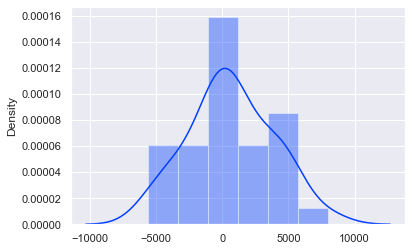

In [199]:
errors = y_test.values.reshape(36, 1) - predictions
sns.distplot(errors)

**Model 2 - TF Regression - Log Transformed Cases per 100,000**

In [200]:
X = covid_factors[['OECD','Obesity', 'Smoking', 'Life_Expectancy']]
y = covid_factors[['Log_Cases']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [201]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [202]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [203]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),epochs=500)

Epoch 1/500
5/5 [==============================] - 1s 156ms/step - loss: 48.5508 - val_loss: 54.9783
Epoch 2/500
5/5 [==============================] - 0s 18ms/step - loss: 47.8632 - val_loss: 54.2509
Epoch 3/500
5/5 [==============================] - 0s 15ms/step - loss: 47.2661 - val_loss: 53.5975
Epoch 4/500
5/5 [==============================] - 0s 19ms/step - loss: 46.6519 - val_loss: 52.8410
Epoch 5/500
5/5 [==============================] - 0s 18ms/step - loss: 45.9114 - val_loss: 51.8918
Epoch 6/500
5/5 [==============================] - 0s 17ms/step - loss: 44.9821 - val_loss: 50.6955
Epoch 7/500
5/5 [==============================] - 0s 14ms/step - loss: 43.8323 - val_loss: 49.1845
Epoch 8/500
5/5 [==============================] - 0s 16ms/step - loss: 42.3758 - val_loss: 47.2520
Epoch 9/500
5/5 [==============================] - 0s 18ms/step - loss: 40.5547 - val_loss: 44.8681
Epoch 10/500
5/5 [==============================] - 0s 16ms/step - loss: 38.3360 - val_loss: 42.025

Epoch 165/500
5/5 [==============================] - 0s 15ms/step - loss: 2.9915 - val_loss: 2.1575
Epoch 166/500
5/5 [==============================] - 0s 15ms/step - loss: 3.0156 - val_loss: 2.1436
Epoch 167/500
5/5 [==============================] - 0s 13ms/step - loss: 2.9964 - val_loss: 2.2809
Epoch 168/500
5/5 [==============================] - 0s 12ms/step - loss: 3.0043 - val_loss: 2.2754
Epoch 169/500
5/5 [==============================] - 0s 13ms/step - loss: 2.9969 - val_loss: 2.2011
Epoch 170/500
5/5 [==============================] - 0s 13ms/step - loss: 2.9851 - val_loss: 2.1644
Epoch 171/500
5/5 [==============================] - 0s 13ms/step - loss: 2.9924 - val_loss: 2.1647
Epoch 172/500
5/5 [==============================] - 0s 13ms/step - loss: 2.9895 - val_loss: 2.1454
Epoch 173/500
5/5 [==============================] - 0s 13ms/step - loss: 2.9932 - val_loss: 2.1371
Epoch 174/500
5/5 [==============================] - 0s 12ms/step - loss: 2.9919 - val_loss: 2.1579


Epoch 328/500
5/5 [==============================] - 0s 14ms/step - loss: 2.8191 - val_loss: 1.9977
Epoch 329/500
5/5 [==============================] - 0s 12ms/step - loss: 2.8235 - val_loss: 2.0059
Epoch 330/500
5/5 [==============================] - 0s 15ms/step - loss: 2.8239 - val_loss: 2.0027
Epoch 331/500
5/5 [==============================] - 0s 16ms/step - loss: 2.8187 - val_loss: 2.0303
Epoch 332/500
5/5 [==============================] - 0s 15ms/step - loss: 2.8132 - val_loss: 2.0523
Epoch 333/500
5/5 [==============================] - 0s 14ms/step - loss: 2.8114 - val_loss: 2.0803
Epoch 334/500
5/5 [==============================] - 0s 16ms/step - loss: 2.8092 - val_loss: 2.0606
Epoch 335/500
5/5 [==============================] - 0s 13ms/step - loss: 2.8252 - val_loss: 1.9999
Epoch 336/500
5/5 [==============================] - 0s 14ms/step - loss: 2.8147 - val_loss: 1.9914
Epoch 337/500
5/5 [==============================] - 0s 13ms/step - loss: 2.8168 - val_loss: 2.0336


Epoch 410/500
5/5 [==============================] - 0s 14ms/step - loss: 2.7540 - val_loss: 2.0244
Epoch 411/500
5/5 [==============================] - 0s 13ms/step - loss: 2.7543 - val_loss: 2.0595
Epoch 412/500
5/5 [==============================] - 0s 12ms/step - loss: 2.7631 - val_loss: 1.9658
Epoch 413/500
5/5 [==============================] - 0s 13ms/step - loss: 2.7612 - val_loss: 1.9747
Epoch 414/500
5/5 [==============================] - 0s 13ms/step - loss: 2.7480 - val_loss: 2.0153
Epoch 415/500
5/5 [==============================] - 0s 12ms/step - loss: 2.7363 - val_loss: 2.0261
Epoch 416/500
5/5 [==============================] - 0s 13ms/step - loss: 2.7667 - val_loss: 1.9648
Epoch 417/500
5/5 [==============================] - 0s 14ms/step - loss: 2.7396 - val_loss: 2.0594
Epoch 418/500
5/5 [==============================] - 0s 13ms/step - loss: 2.7337 - val_loss: 2.0866
Epoch 419/500
5/5 [==============================] - 0s 13ms/step - loss: 2.7245 - val_loss: 1.9977


<AxesSubplot:>

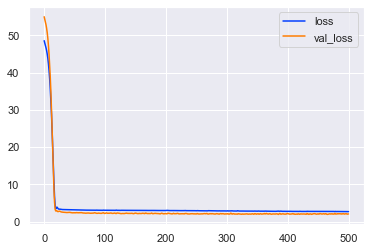

In [204]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [205]:
predictions = model.predict(X_test)

Text(0.5, 1.0, 'Tensorflow Model 2')

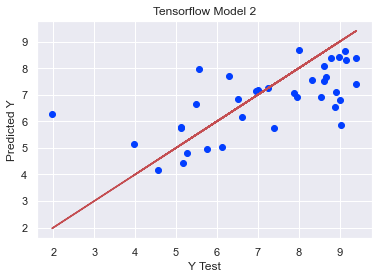

In [206]:
# Our predictions
plt.scatter(y_test,predictions)
# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Tensorflow Model 2')

In [207]:
tf2_mae = mean_absolute_error(y_test,predictions)
tf2_rmse = np.sqrt(mean_squared_error(y_test,predictions))
tf2_evs = explained_variance_score(y_test,predictions)
print('Mean Absolute Error: ', tf2_mae)
print('Root Mean Square Error: ', tf2_rmse)
print('Explained Variance Score: ', tf2_evs)

Mean Absolute Error:  1.123924753012088
Root Mean Square Error:  1.4319239242108965
Explained Variance Score:  0.42222019179265347


C:\Users\user\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

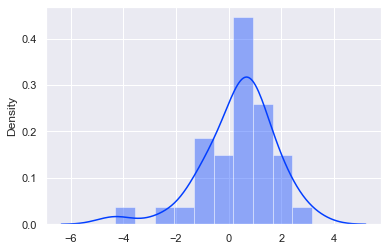

In [208]:
errors = y_test.values.reshape(36, 1) - predictions
sns.distplot(errors)

## Sklearn Linear Regression

**Model 1 - Sklearn Regression - Cases per 100k (no transformation)**

In [209]:
from sklearn.linear_model import LinearRegression

In [210]:
X = covid_factors[['OECD','Obesity', 'Smoking', 'Life_Expectancy']]
y = covid_factors[['Cases_per_100k']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [211]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [212]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression()

In [213]:
print('Coefficients: ', lm1.coef_)

Coefficients:  [[2468.75565263 1943.3641193  3415.6872737  1970.39957348]]


In [214]:
print('Intercept: ', lm1.intercept_)

Intercept:  [-1266.95344306]


In [215]:
predictions = lm1.predict(X_test)

Text(0.5, 1.0, 'Sklearn Model 1')

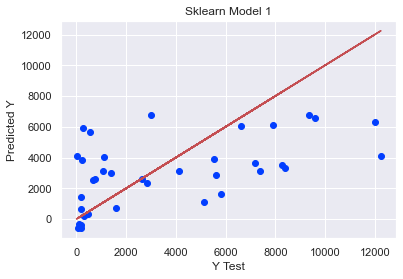

In [216]:
# Our predictions
plt.scatter(y_test,predictions)
# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Sklearn Model 1')

In [217]:
sk1_mae = mean_absolute_error(y_test,predictions)
sk1_rmse = np.sqrt(mean_squared_error(y_test,predictions))
sk1_evs = explained_variance_score(y_test,predictions)
print('Mean Absolute Error: ', sk1_mae)
print('Root Mean Square Error: ', sk1_rmse)
print('Explained Variance Score: ', sk1_evs)

Mean Absolute Error:  2537.5999667410215
Root Mean Square Error:  3213.3302053896455
Explained Variance Score:  0.2926423382185227


C:\Users\user\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

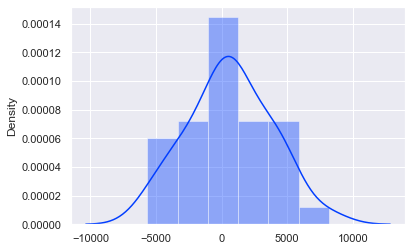

In [218]:
errors = y_test.values.reshape(36, 1) - predictions
sns.distplot(errors)

**Model 2 - Sklearn Regression - Log Transformed Cases per 100k**

In [219]:
X = covid_factors[['OECD','Obesity', 'Smoking', 'Life_Expectancy']]
y = covid_factors[['Log_Cases']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [220]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [221]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

In [222]:
print('Coefficients: ', lm2.coef_)

Coefficients:  [[1.20845278 2.21940058 1.06436086 1.43150084]]


In [223]:
print('Intercept: ', lm2.intercept_)

Intercept:  [4.06906574]


In [224]:
predictions = lm2.predict(X_test)

Text(0.5, 1.0, 'Sklearn Model 2')

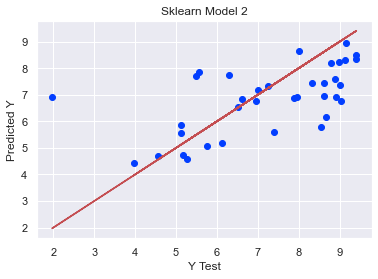

In [227]:
# Our predictions
plt.scatter(y_test,predictions)
# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Sklearn Model 2')

In [226]:
sk2_mae = mean_absolute_error(y_test,predictions)
sk2_rmse = np.sqrt(mean_squared_error(y_test,predictions))
sk2_evs = explained_variance_score(y_test,predictions)
print('Mean Absolute Error: ', sk2_mae)
print('Root Mean Square Error: ', sk2_rmse)
print('Explained Variance Score: ', sk2_evs)

Mean Absolute Error:  1.1438336254287806
Root Mean Square Error:  1.5030785682465666
Explained Variance Score:  0.354631875050228


C:\Users\user\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

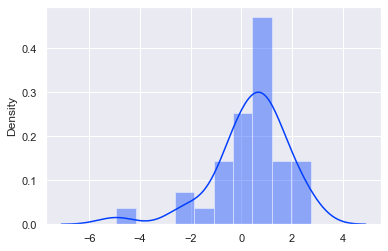

In [228]:
errors = y_test.values.reshape(36, 1) - predictions
sns.distplot(errors)

In [229]:
data = {'Mean Absolute Error':[tf1_mae, sk1_mae, tf2_mae, sk2_mae],
        'Root Square Mean Error':[tf1_rmse, sk1_rmse, tf2_rmse, sk2_rmse],
       'Explained Variance Score': [tf1_evs, sk1_evs, tf2_evs, sk2_evs]}
  
# Creates pandas DataFrame.
compare_scores = pd.DataFrame(data, index =['TF 1 - Cases Untransformed',
                                'SK 1 - Cases Untransformed',
                                'TF 2 - Log Transformed Cases',
                                'SK 2 - Log Transformed Cases'])

compare_scores

,Mean Absolute Error,Root Square Mean Error,Explained Variance Score
TF 1 - Cases Untransformed,2480.562607,3215.244766,0.294342
SK 1 - Cases Untransformed,2537.599967,3213.330205,0.292642
TF 2 - Log Transformed Cases,1.123925,1.431924,0.422220
SK 2 - Log Transformed Cases,1.143834,1.503079,0.354632


In [231]:
conn.close()

## 5. Conclusion

Overall, I think this project was successful as it produced some interesting findings. While the hypothesis testing showed evidence of a significant difference between female-led OECD countries and male-led OECD countries, there was no significant difference when considering all countries in the dataset. This seems to reinforce Winsor et al.’s critique of the media and other research studies for focusing too much on OECD countries when reporting on lower rates of COVID-19 for female-led countries compared to countries led by men.

I also feel that the regression analysis was successful to a certain extent, as the strongest regression model has an explained variance score of 42%, and although this might be considered low, it is higher than I expected to achieve due to the complex nature of the virus. 

However, there are still lots of ways in which the regression analysis could be improved, for example:\
•	More independent variables could be added, such as air pollution rates, the population density of a country, if the country is an island, etc. \
•	The moderate to high correlation between the independent variables suggests that there may be an issue with multicollinearity. This should be investigated further as multicollinearity undermines the statistical significance of an independent variable.\
•	More outliers could be omitted, such as small island nations with very low populations, to make the data less noisy, or the significant outliers which were dropped could have been kept in the dataset, such as Czech Republic and Hungary, to make the data less biased.\
•	The data for obesity and smoking is for 2017, but trends show that obesity is increasing globally every year, while smoking deaths rates are generally decreasing in most countries (but increasing in some low-to-middle income countries), so more current data would give more accurate results. 

How could the data be used in the future?

It is important for us to try to understand the factors that are related to high COVID-19 cases and deaths around the world, for us to try to minimize the spread and severity of this virus and other viruses in the future.  For example, if findings show that the elderly population are more at risk from these types of viruses, governments should try to introduce more policies that protect older citizens.  

Also, if further studies show more evidence of strong correlation between factors such as smoking or obesity and a higher risk of hospitalization or death due to viruses like COVID-19, then there are more incentives for individuals to make better lifestyle choices. 

Lastly, it is encouraging to see that in developed countries there is evidence to suggest female leaders have been more effective at handling this pandemic. These findings may boost the public’s perceptions of women leaders, encourage more women to enter politics and leadership positions, and it may also inspire male heads of state to reflect upon what they can learn from female-led countries.


## 6. References

•	Coscieme, L., Fioramonti, L., Mortensen, L. F., Pickett, K. E., Kubiszewski, I., Lovins, H., ... & Wilkinson, R. (2020). Women in power: female leadership and public health outcomes during the COVID-19 pandemic. MedRxiv. \
•	Dietz, W., & Santos‐Burgoa, C. (2020). Obesity and its implications for COVID‐19 mortality. Obesity, 28(6), 1005-1005.\
•	Dowd, J. B., Andriano, L., Brazel, D. M., Rotondi, V., Block, P., Ding, X., ... & Mills, M. C. (2020). Demographic science aids in understanding the spread and fatality rates of COVID-19. Proceedings of the National Academy of Sciences, 117(18), 9696-9698.\
•	Gao, F., Zheng, K. I., Wang, X. B., Sun, Q. F., Pan, K. H., Wang, T. Y., ... & Zheng, M. H. (2020). Obesity is a risk factor for greater COVID-19 severity. Diabetes care, 43(7), e72-e74. Garikipati, S., & Kambhampati, U. (2021). Leading the Fight against the Pandemic: Does Gender really matter?. Feminist Economics, 27(1-2), 401-418. \
•	Lewis, T. (2020). Smoking or vaping may increase the risk of a severe coronavirus infection. Scientific American, 17. \
•	Popkin, B. M., Du, S., Green, W. D., Beck, M. A., Algaith, T., Herbst, C. H., ... & Shekar, M. (2020). Individuals with obesity and COVID‐19: A global perspective on the epidemiology and biological relationships. Obesity Reviews, 21(11), e13128. \
•	Shastri, M. D., Shukla, S. D., Chong, W. C., Kc, R., Dua, K., Patel, R. P., Peterson, G. M., & O'Toole, R. F. (2021). Smoking and COVID-19: What we know so far. Respiratory medicine, 176, 106237. https://doi.org/10.1016/j.rmed.2020.106237 \
•	Windsor, L. C., Yannitell Reinhardt, G., Windsor, A. J., Ostergard, R., Allen, S., Burns, C., ... & Wood, R. (2020). Gender in the time of COVID-19: Evaluating national leadership and COVID-19 fatalities. PloS one, 15(12), e0244531.
